**importing the torchvision to read the images and ToTensor to convert them to arrays**

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.MNIST(root = "data", 
                               train = True, 
                               transform=ToTensor(), 
                               download = False)

testing_data = datasets.MNIST(root = "data", 
                              train = True, 
                              transform=ToTensor(), 
                              download = False)

In [4]:
from torch.utils.data import DataLoader

loaders = {'train': DataLoader(training_data, 
                               batch_size=100, 
                               shuffle= True, 
                               num_workers=1),
                               
           'test': DataLoader(training_data, 
                              batch_size=100, 
                              shuffle= True, 
                              num_workers=1), }


In [5]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
training_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [7]:
training_data.data.shape

torch.Size([60000, 28, 28])

**Creating the Convolutional Neural Network architecture with the ReLU and softmax activation Functions**

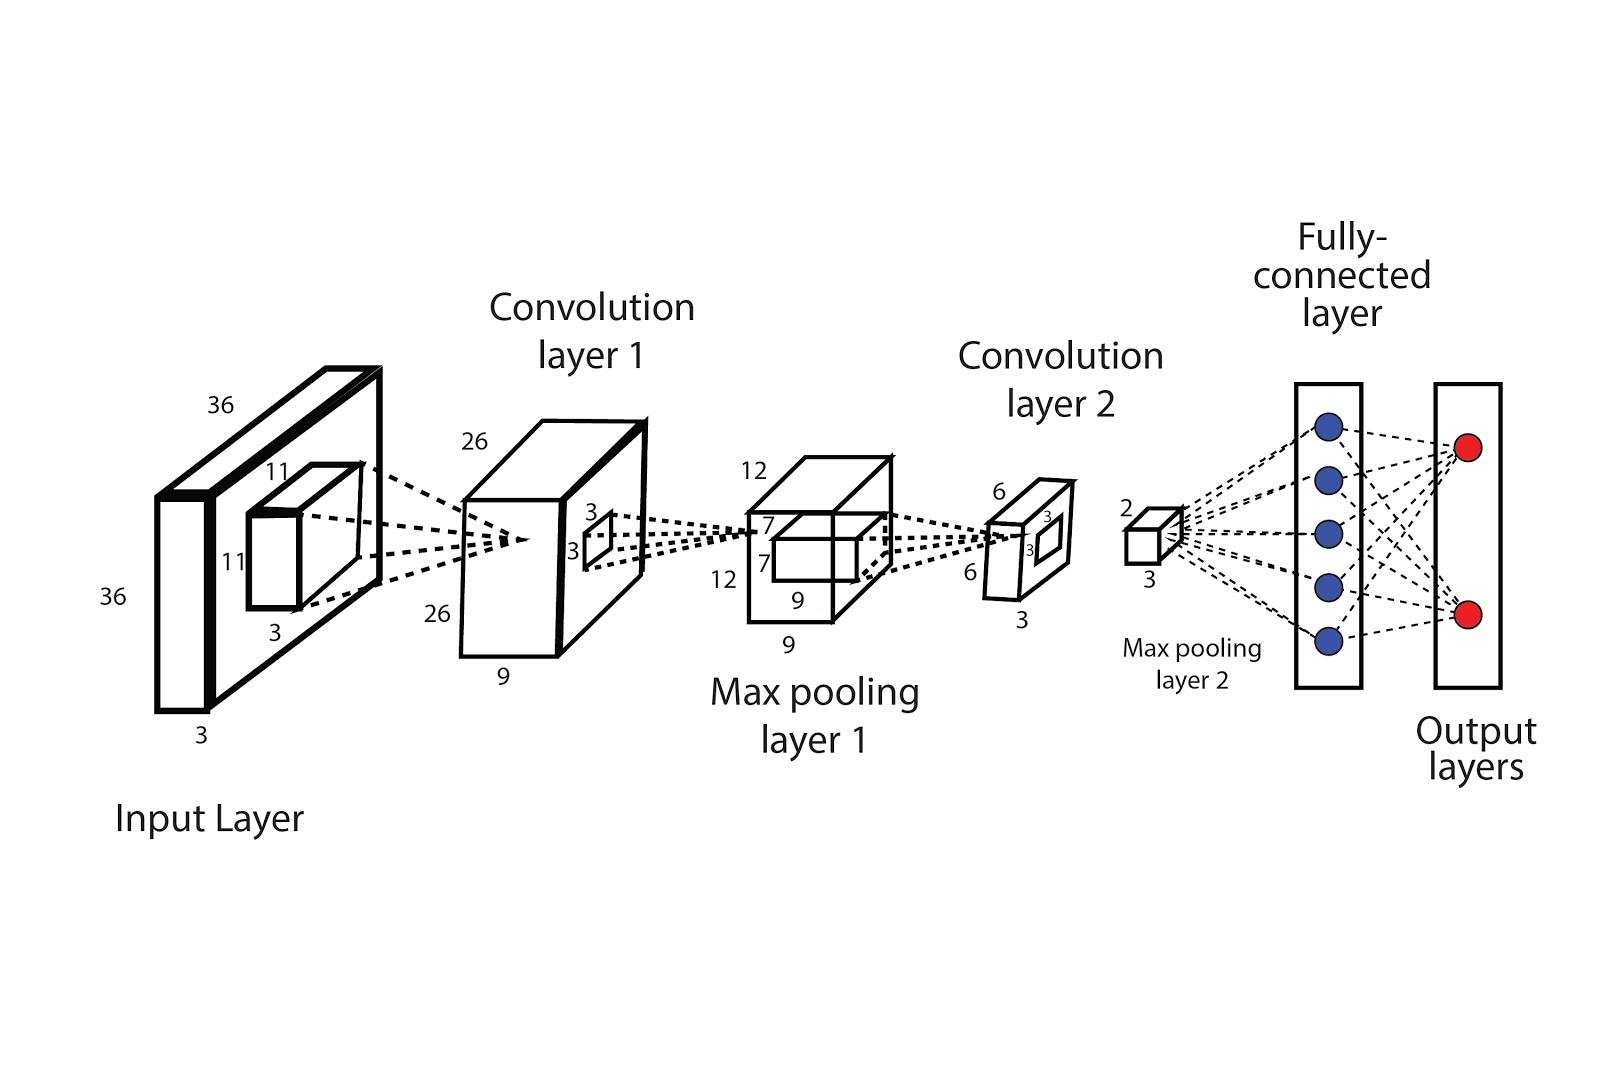

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from IPython.display import Image

class Convolutionl_Neural_Network(nn.Module):
    def __init__(self):
        super(Convolutionl_Neural_Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv_dropout = nn.Dropout2d()
        self.fully_connected_layer = nn.Linear(320, 50)
        self.fully_connected_layer2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv_dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fully_connected_layer(x))
        x = nn.functional.dropout(x, training= self.training)
        x = self.fully_connected_layer2(x)
        return nn.functional.softmax(x)
        
image_path = 'C:\\Users\\Esmail\\Desktop\\DigitClassifierCNN\\architecture.png'
Image(filename=image_path)


**specify which hardware(cpu or gpu) should the learning work on and use the Adma alogrithm to optimize the model parameters
and calculate the loss function**

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Convolutionl_Neural_Network().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_function = nn.CrossEntropyLoss()


**creating the training and testing alogirthms (using the ideal algorithm: BackPropagation)**

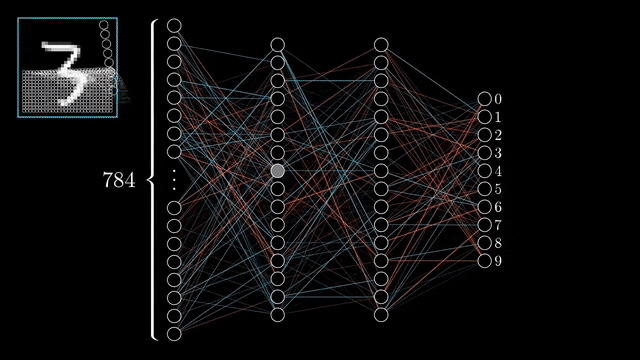

In [7]:
def train(epoch):
    model.train()
    for batch, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch%20==0:
            print(f'Train Epoch: {epoch} [{batch * len(data)}/ {len(loaders["train"].dataset)} ({100. * batch / len(loaders["train"]):.0f} %)]\t{loss.item():.6}')
def test():
    model.eval()

    loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['train']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss += loss_function(output, target).item()
            prediction = output.argmax(dim = 1, keepdim= True)
            correct+=prediction.eq(target.view_as(prediction)).sum().item()
    loss/= len(loaders['train'].dataset)
    print(f'\n Test set: Average loss: {loss:.4f}, Occuracy{correct}/ {len(loaders["train"].dataset)} ({100. * correct/len(loaders["train"].dataset):.0f} %\n')
image_path = 'C:\\Users\\Esmail\\Desktop\\DigitClassifierCNN\\explain.gif'
Image(filename=image_path)     


In [11]:
for epoch in range(1, 11):
    train(epoch)
    test()


C:\Users\Esmail\AppData\Local\Temp\ipykernel_21184\1288195059.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(x)


Train Epoch: 1 [0/ 60000 (0 %)]	2.30277
Train Epoch: 1 [2000/ 60000 (3 %)]	2.29285
Train Epoch: 1 [4000/ 60000 (7 %)]	2.23133
Train Epoch: 1 [6000/ 60000 (10 %)]	2.066
Train Epoch: 1 [8000/ 60000 (13 %)]	1.92836
Train Epoch: 1 [10000/ 60000 (17 %)]	1.84711
Train Epoch: 1 [12000/ 60000 (20 %)]	1.81731
Train Epoch: 1 [14000/ 60000 (23 %)]	1.73379
Train Epoch: 1 [16000/ 60000 (27 %)]	1.63998
Train Epoch: 1 [18000/ 60000 (30 %)]	1.68954
Train Epoch: 1 [20000/ 60000 (33 %)]	1.70752
Train Epoch: 1 [22000/ 60000 (37 %)]	1.69724
Train Epoch: 1 [24000/ 60000 (40 %)]	1.70593
Train Epoch: 1 [26000/ 60000 (43 %)]	1.64081
Train Epoch: 1 [28000/ 60000 (47 %)]	1.64434
Train Epoch: 1 [30000/ 60000 (50 %)]	1.6293
Train Epoch: 1 [32000/ 60000 (53 %)]	1.64133
Train Epoch: 1 [34000/ 60000 (57 %)]	1.65303
Train Epoch: 1 [36000/ 60000 (60 %)]	1.60644
Train Epoch: 1 [38000/ 60000 (63 %)]	1.6485
Train Epoch: 1 [40000/ 60000 (67 %)]	1.6028
Train Epoch: 1 [42000/ 60000 (70 %)]	1.59712
Train Epoch: 1 [44000/ 600

C:\Users\Esmail\AppData\Local\Temp\ipykernel_21184\1288195059.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(x)


Predicted Value is: 5


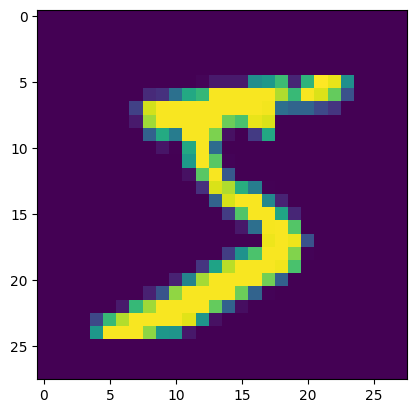

Predicted Value is: 0


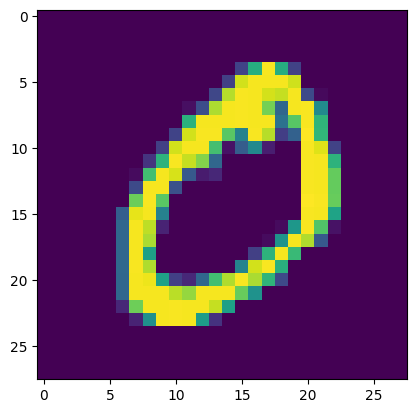

Predicted Value is: 4


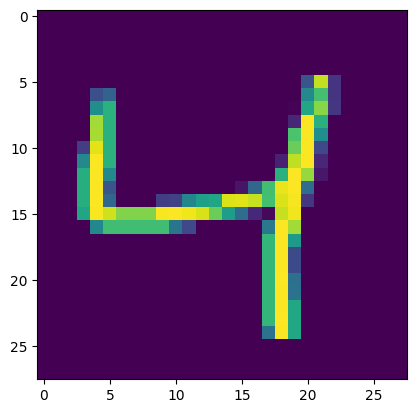

Predicted Value is: 1


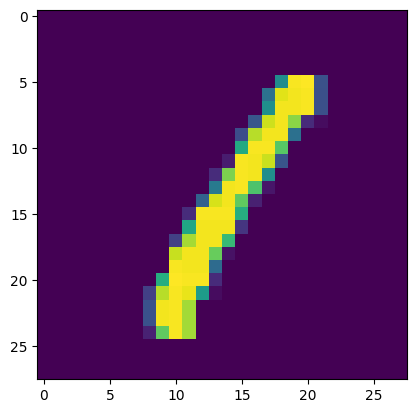

Predicted Value is: 9


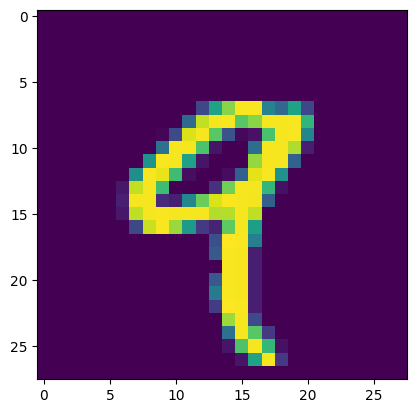

Predicted Value is: 2


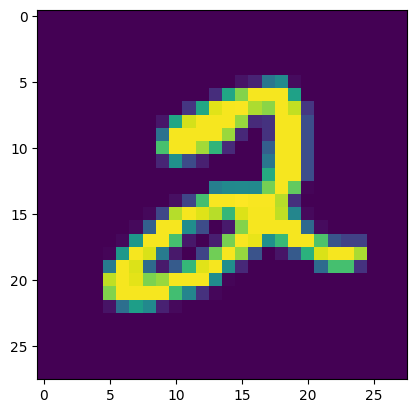

Predicted Value is: 1


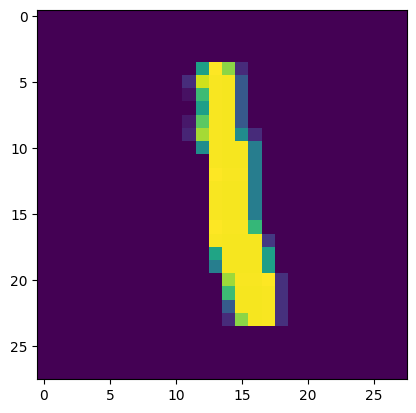

Predicted Value is: 3


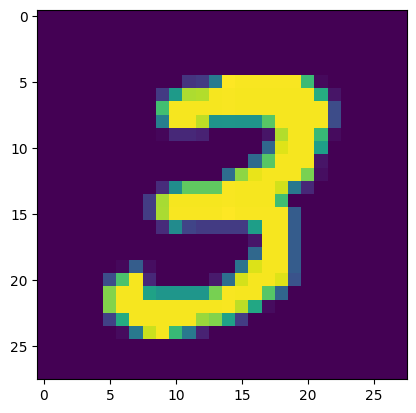

Predicted Value is: 1


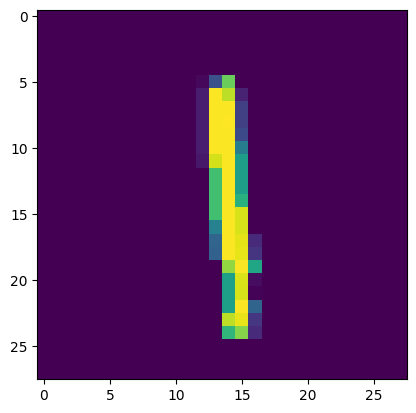

Predicted Value is: 4


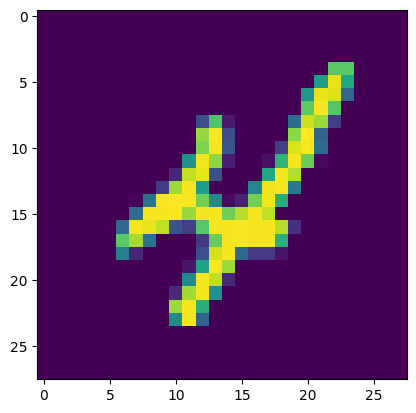

Predicted Value is: 3


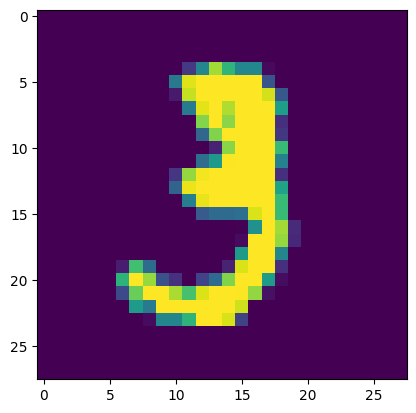

Predicted Value is: 5


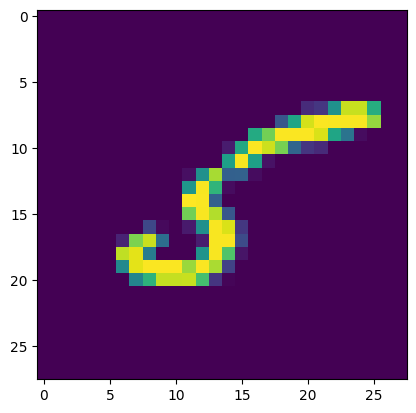

Predicted Value is: 3


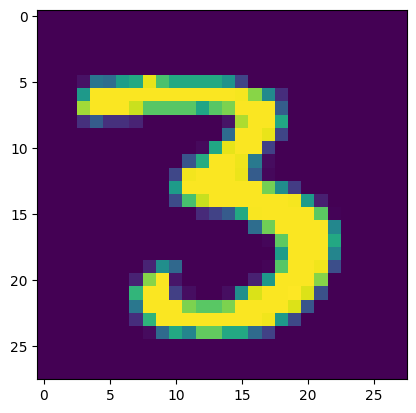

Predicted Value is: 6


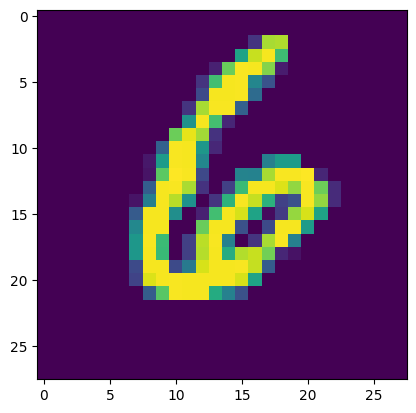

Predicted Value is: 1


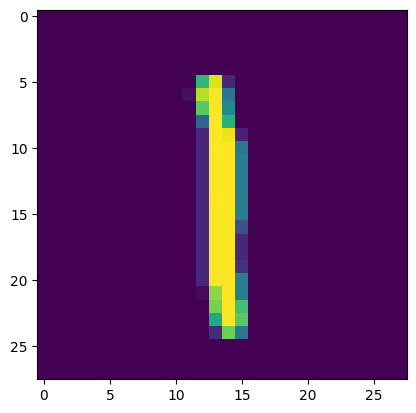

Predicted Value is: 7


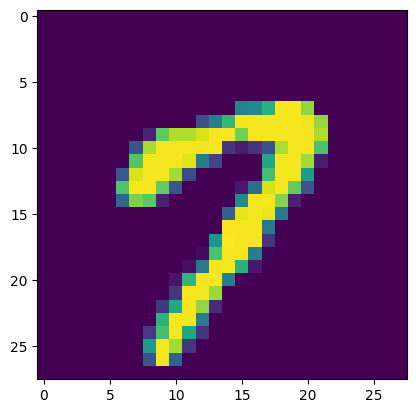

Predicted Value is: 2


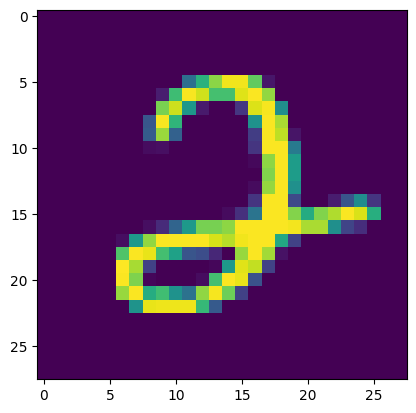

Predicted Value is: 8


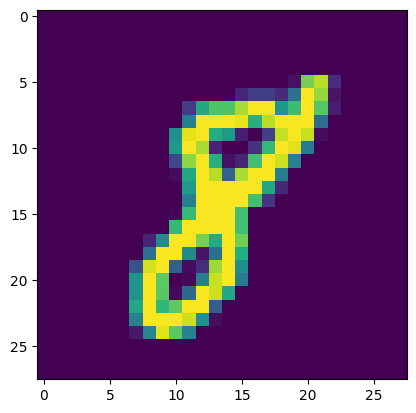

Predicted Value is: 6


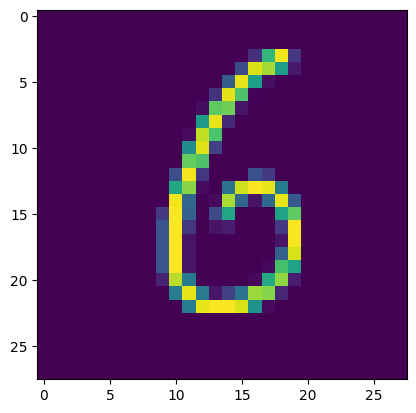

Predicted Value is: 9


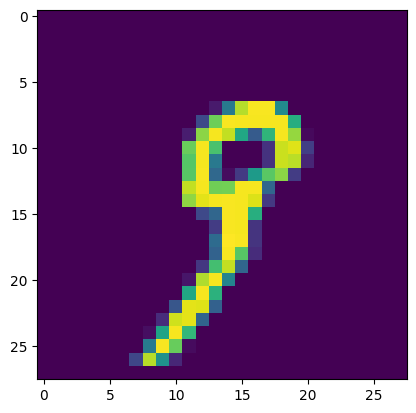

Predicted Value is: 4


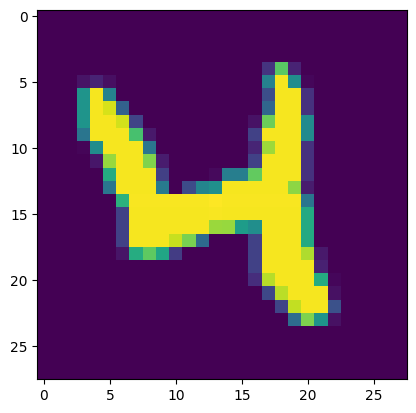

Predicted Value is: 0


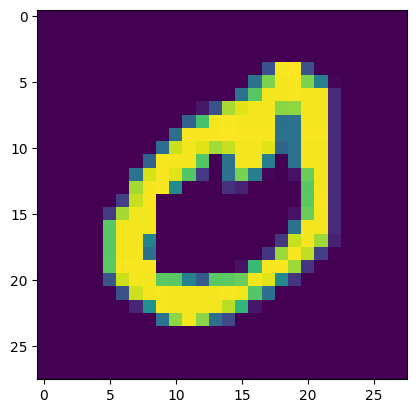

Predicted Value is: 9


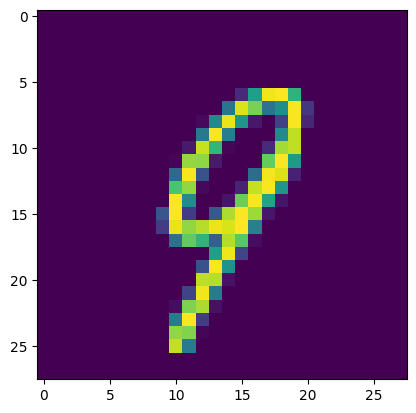

Predicted Value is: 1


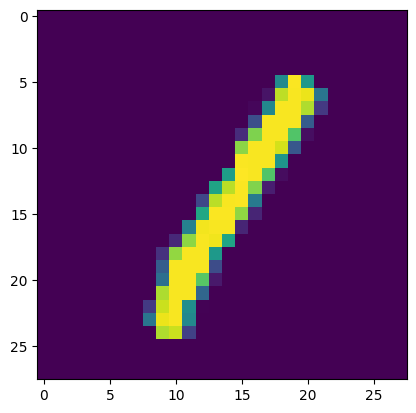

Predicted Value is: 3


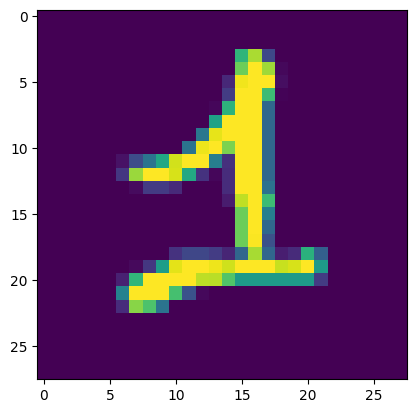

Predicted Value is: 2


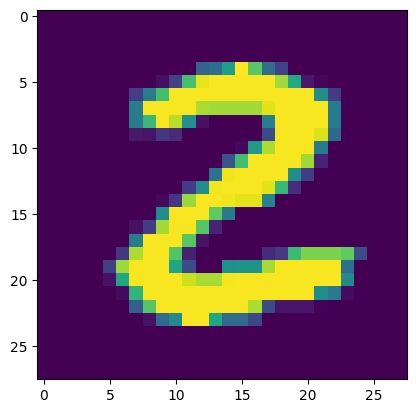

Predicted Value is: 4


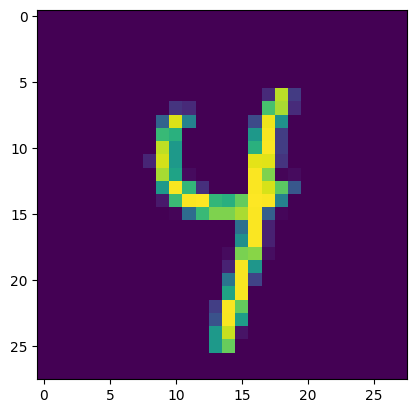

Predicted Value is: 3


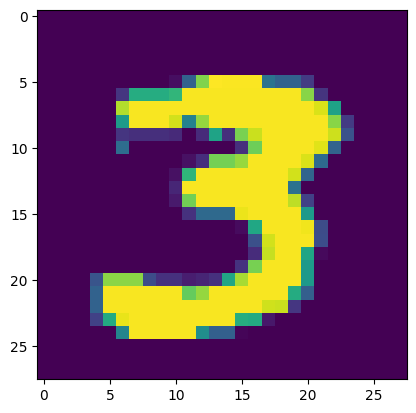

Predicted Value is: 2


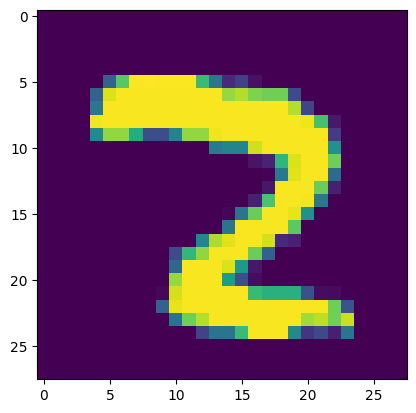

Predicted Value is: 7


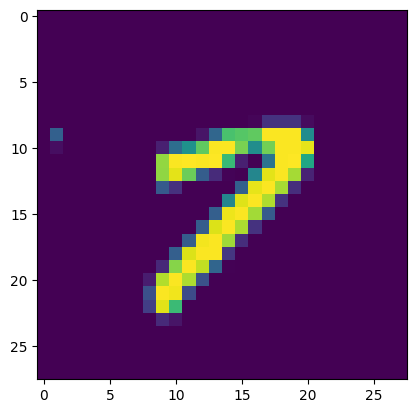

Predicted Value is: 3


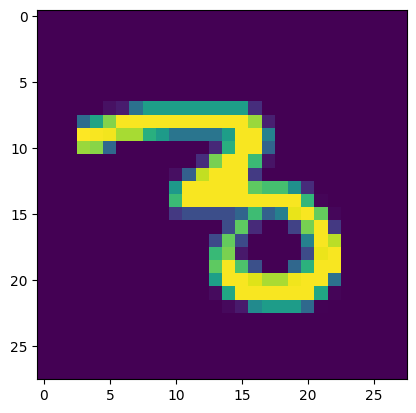

Predicted Value is: 8


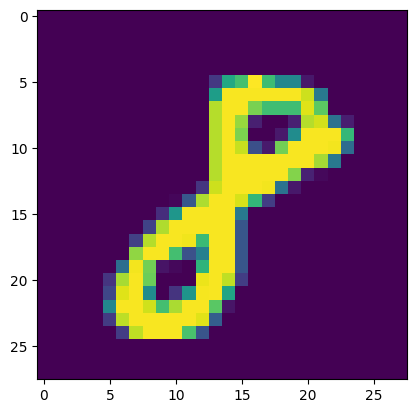

Predicted Value is: 6


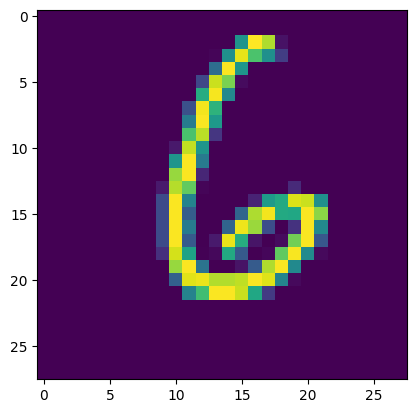

Predicted Value is: 9


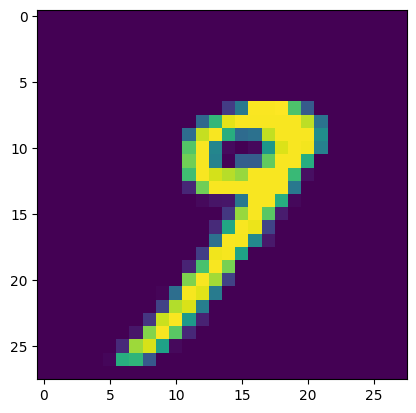

Predicted Value is: 0


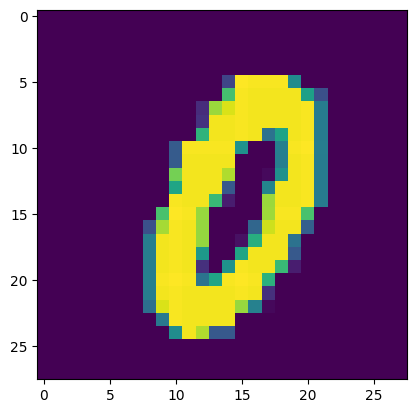

Predicted Value is: 5


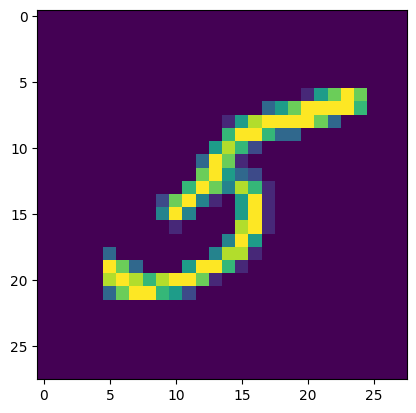

Predicted Value is: 6


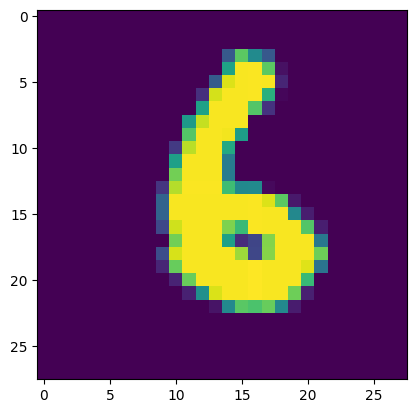

Predicted Value is: 0


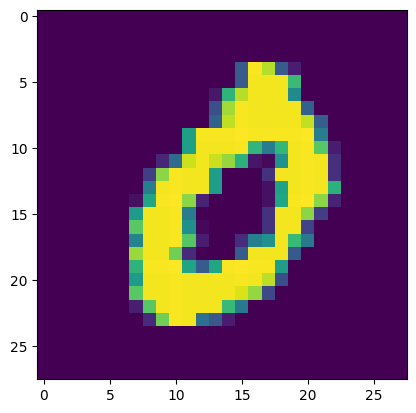

Predicted Value is: 7


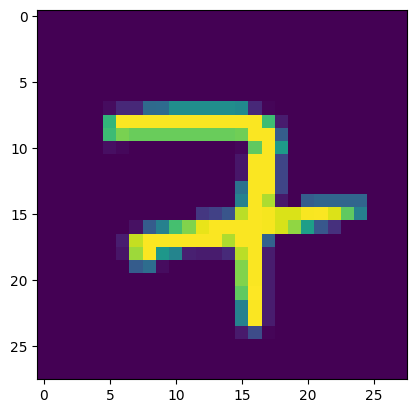

Predicted Value is: 6


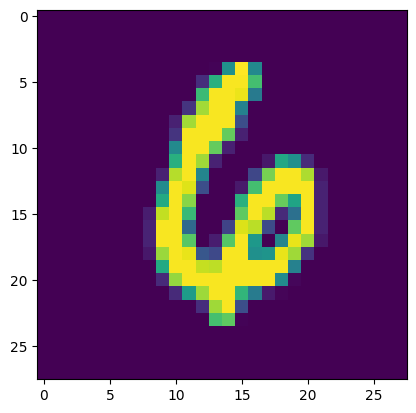

Predicted Value is: 1


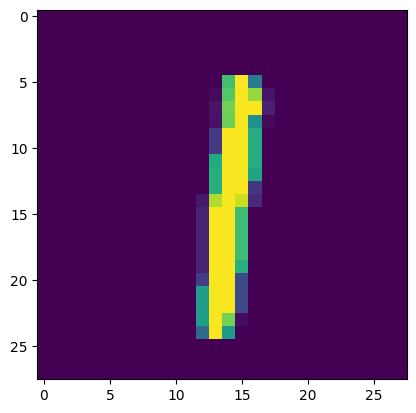

Predicted Value is: 8


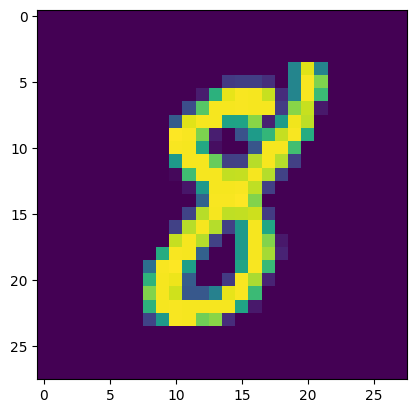

Predicted Value is: 7


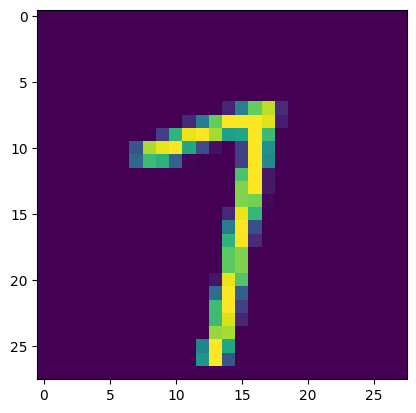

Predicted Value is: 9


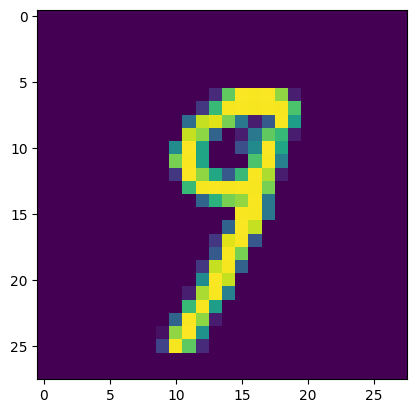

Predicted Value is: 3


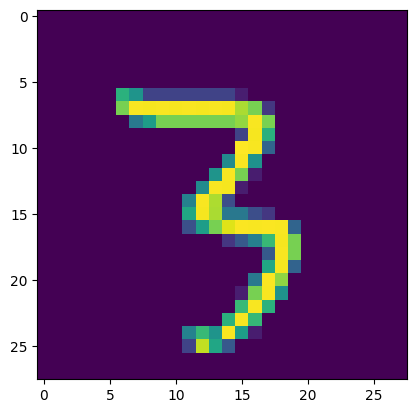

Predicted Value is: 9


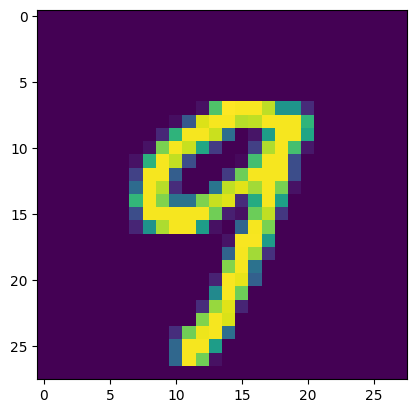

Predicted Value is: 8


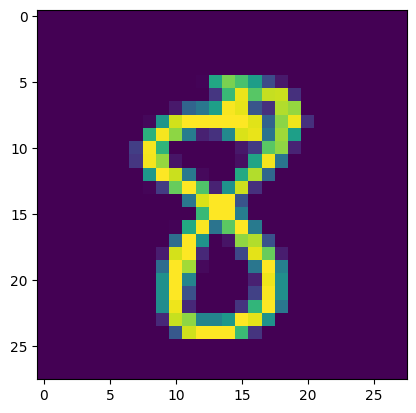

Predicted Value is: 5


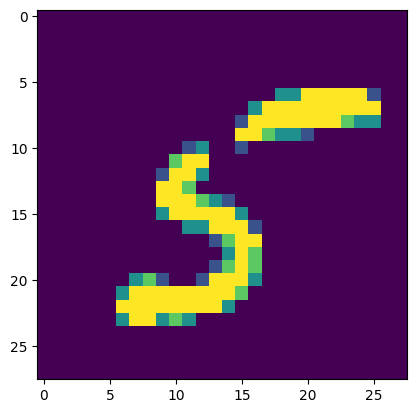

Predicted Value is: 5


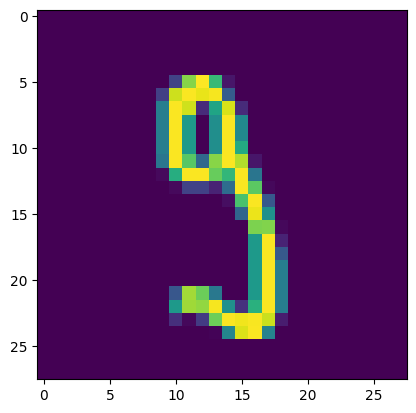

Predicted Value is: 3


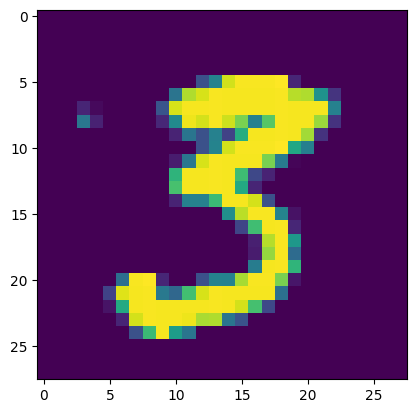

Predicted Value is: 3


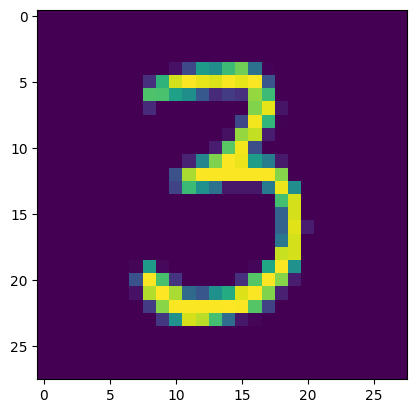

Predicted Value is: 0


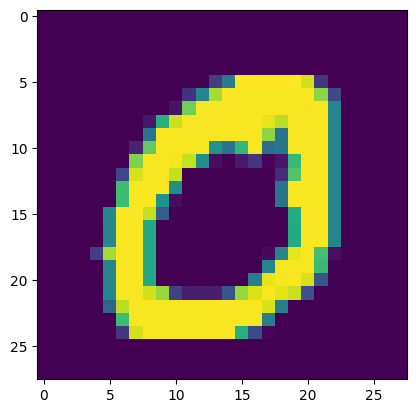

Predicted Value is: 7


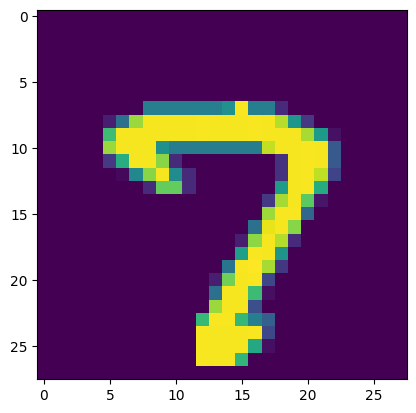

Predicted Value is: 4


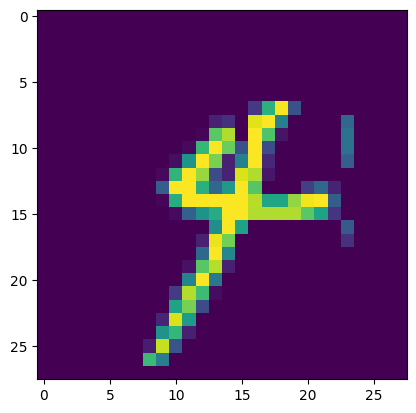

Predicted Value is: 9


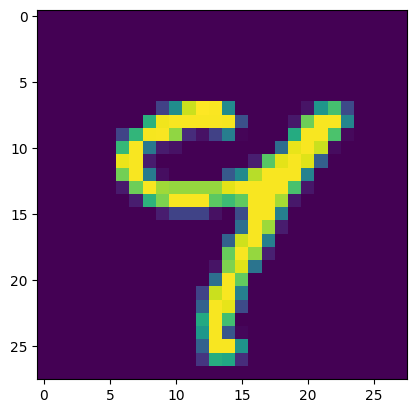

Predicted Value is: 8


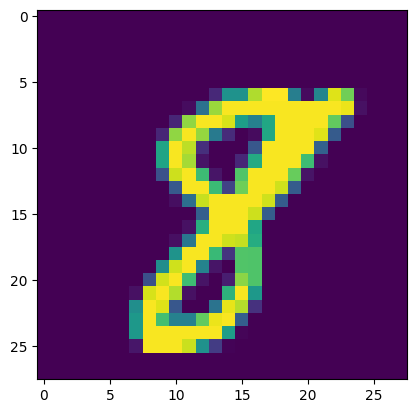

Predicted Value is: 0


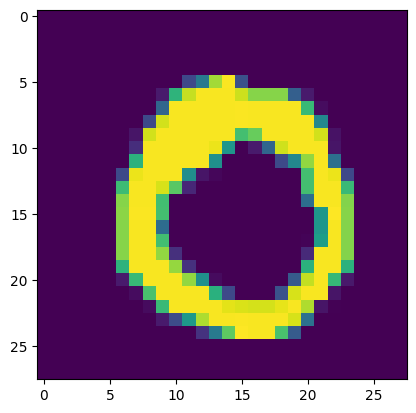

Predicted Value is: 9


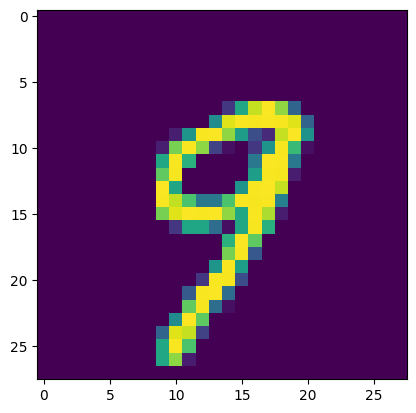

Predicted Value is: 4


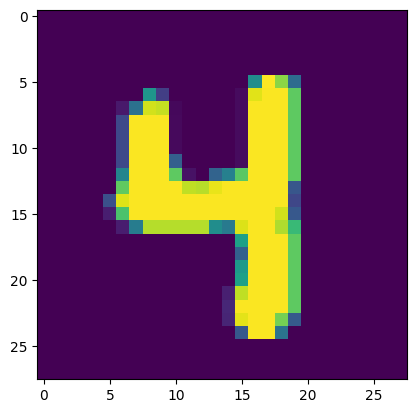

Predicted Value is: 1


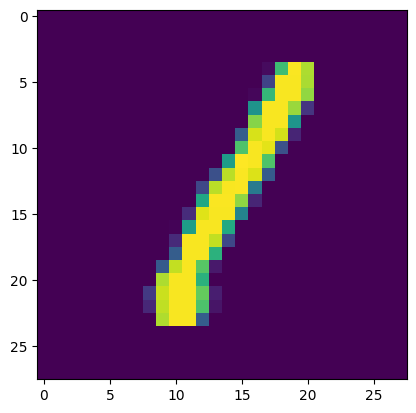

Predicted Value is: 4


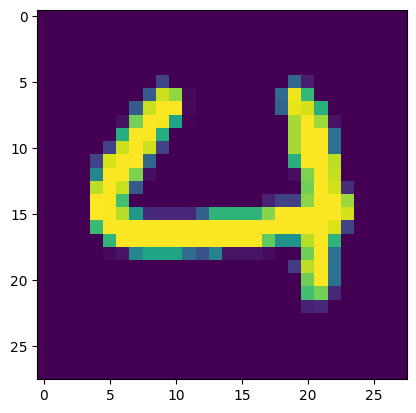

Predicted Value is: 4


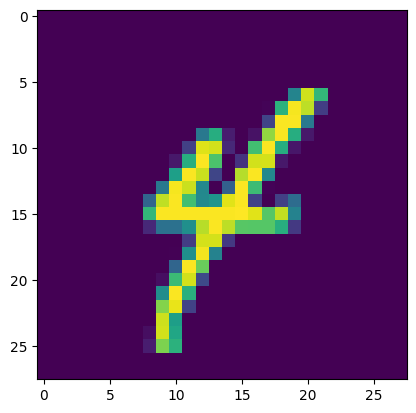

Predicted Value is: 6


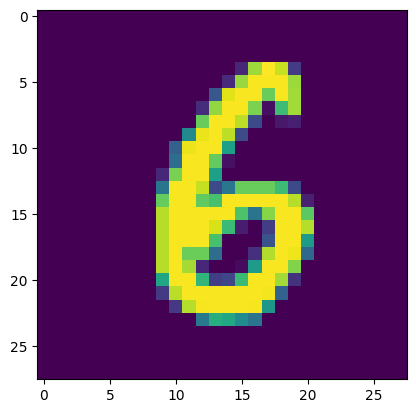

Predicted Value is: 0


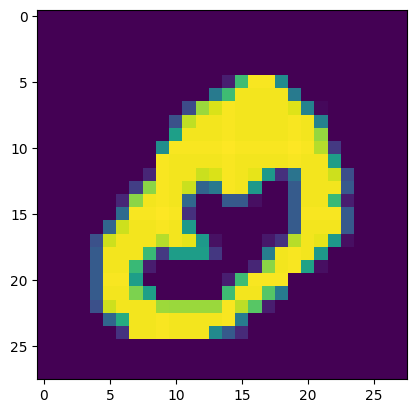

Predicted Value is: 4


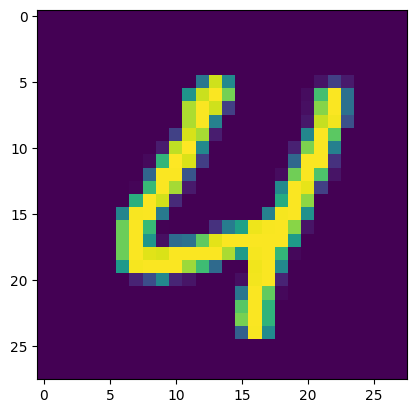

Predicted Value is: 5


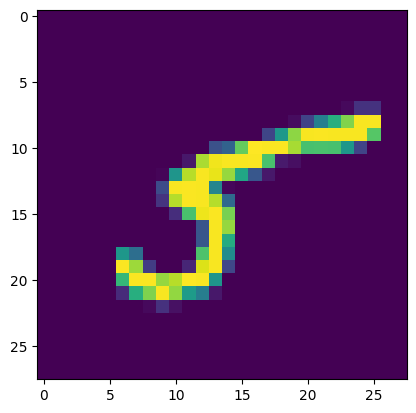

Predicted Value is: 6


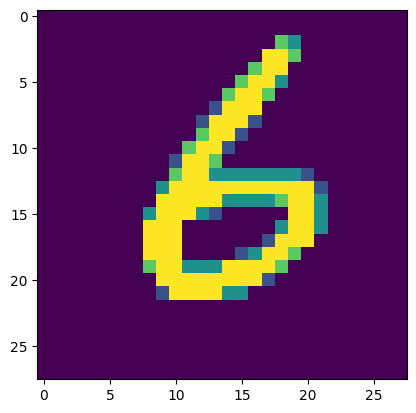

Predicted Value is: 1


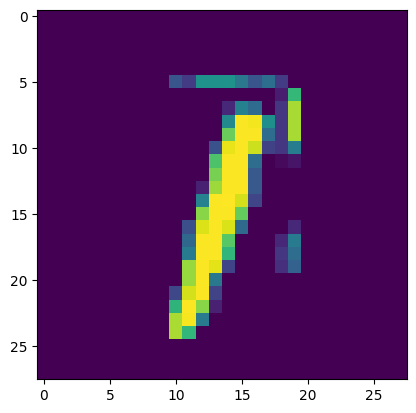

Predicted Value is: 0


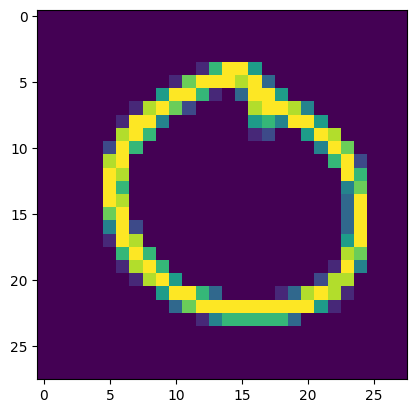

Predicted Value is: 0


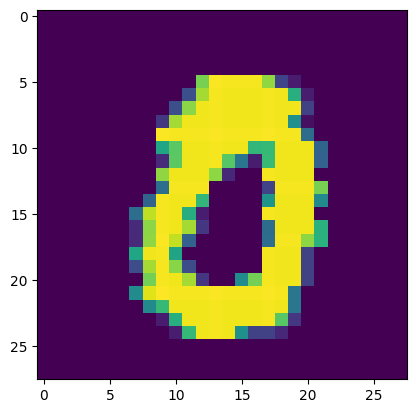

Predicted Value is: 2


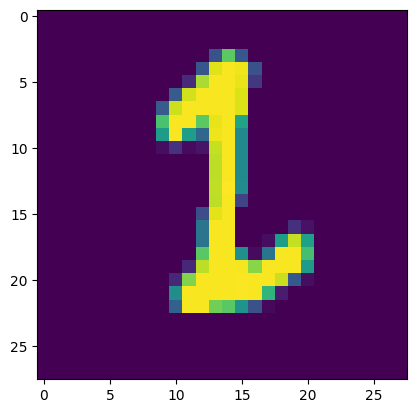

Predicted Value is: 7


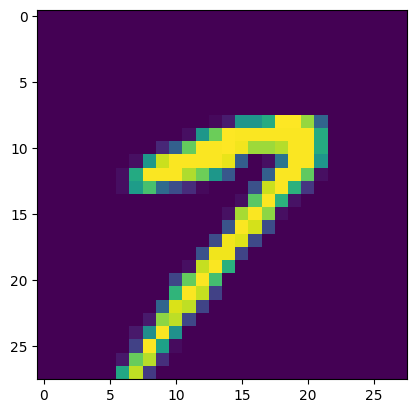

Predicted Value is: 1


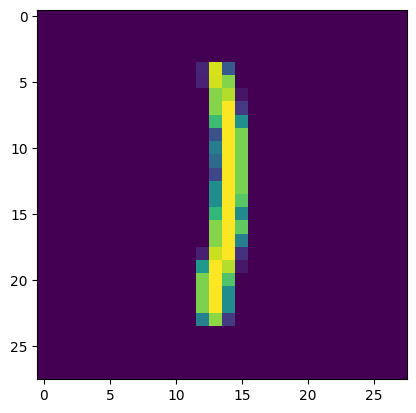

Predicted Value is: 6


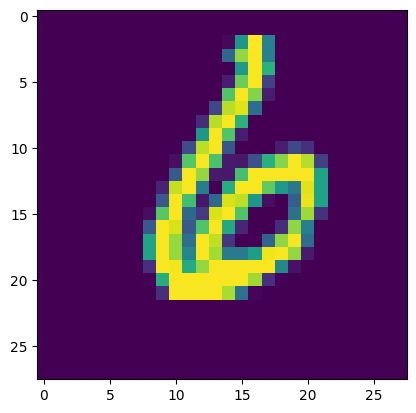

Predicted Value is: 3


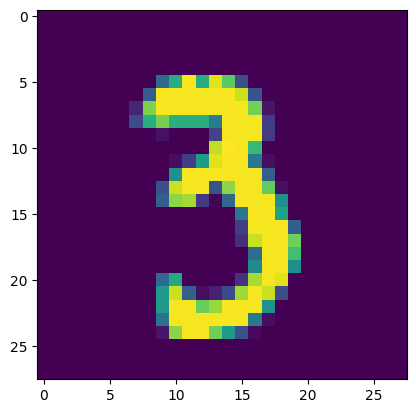

Predicted Value is: 0


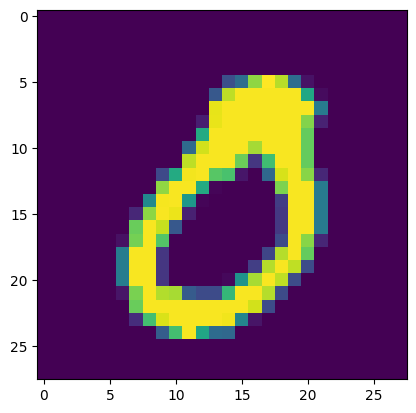

Predicted Value is: 2


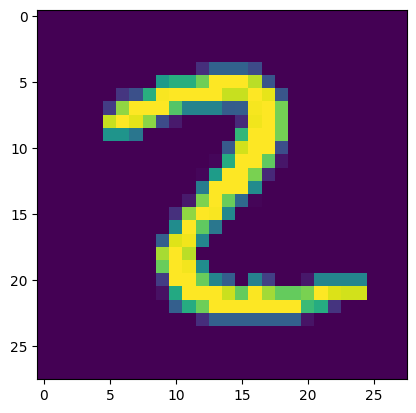

Predicted Value is: 1


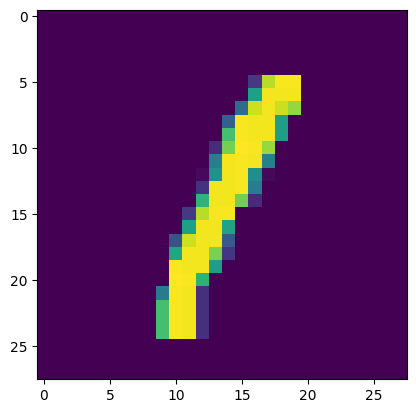

Predicted Value is: 1


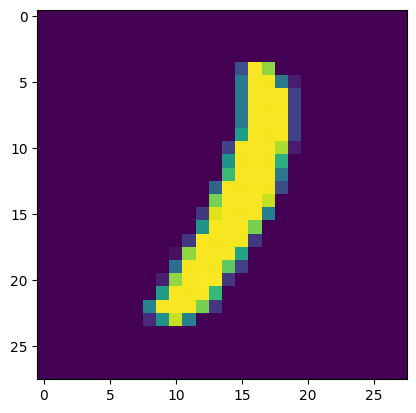

Predicted Value is: 7


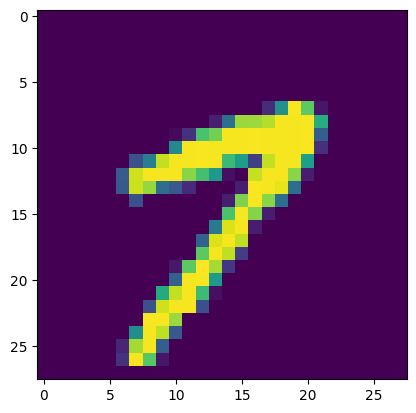

Predicted Value is: 8


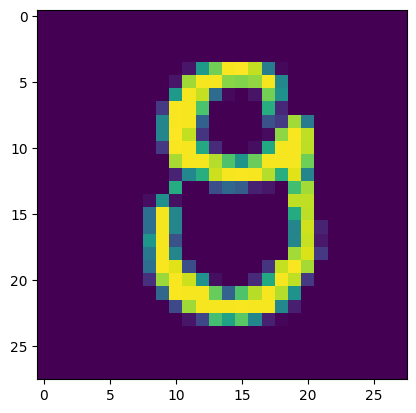

Predicted Value is: 0


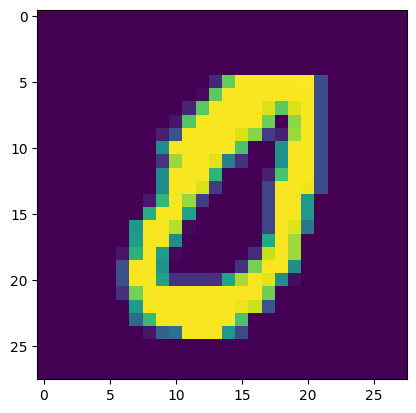

Predicted Value is: 2


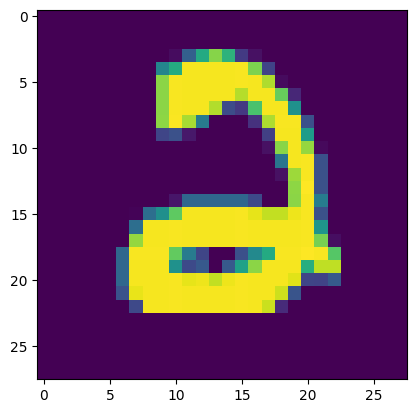

Predicted Value is: 6


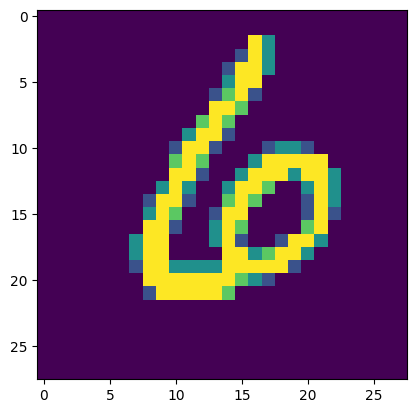

Predicted Value is: 7


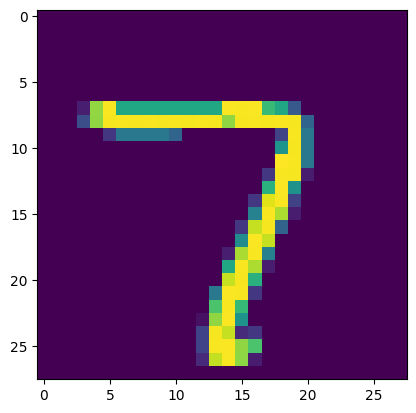

Predicted Value is: 8


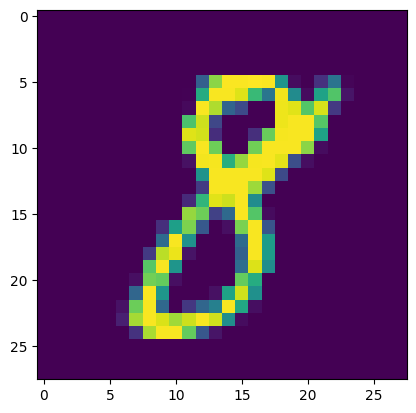

Predicted Value is: 3


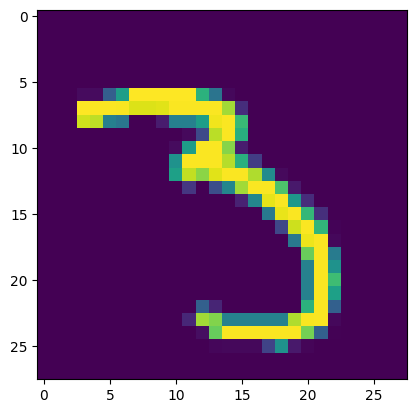

Predicted Value is: 9


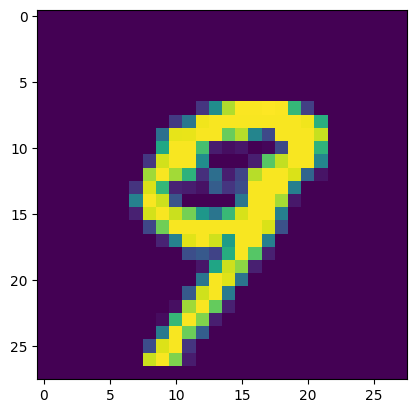

Predicted Value is: 0


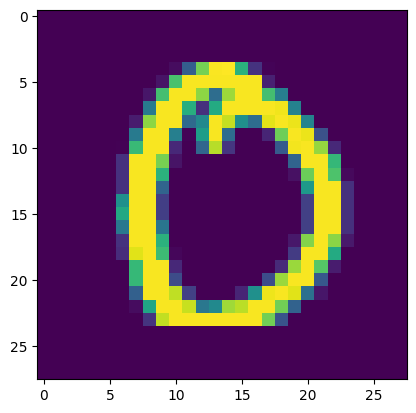

Predicted Value is: 4


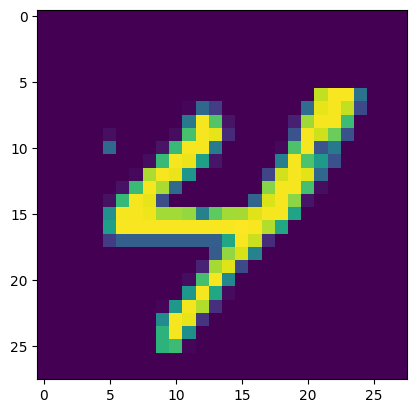

Predicted Value is: 6


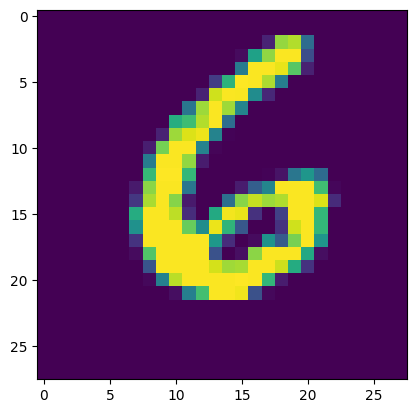

Predicted Value is: 7


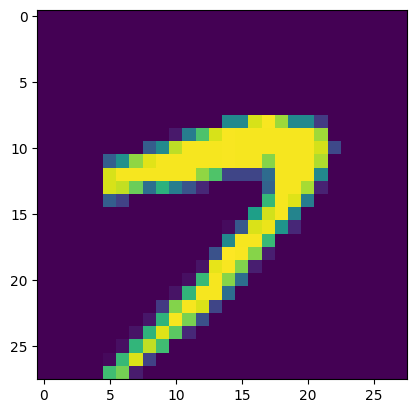

Predicted Value is: 4


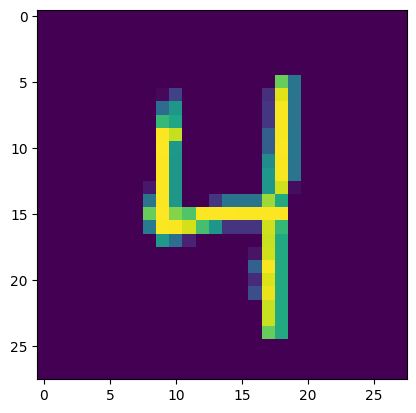

Predicted Value is: 6


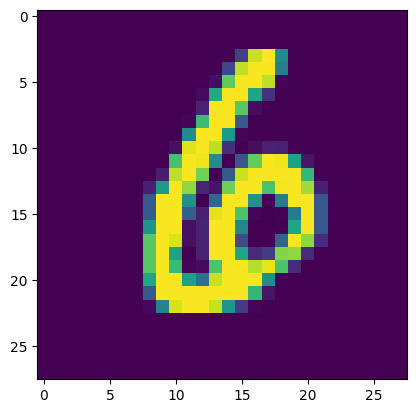

Predicted Value is: 8


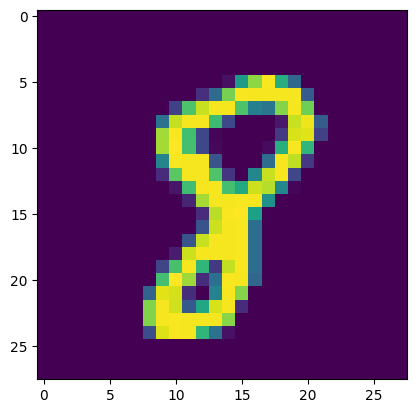

Predicted Value is: 0


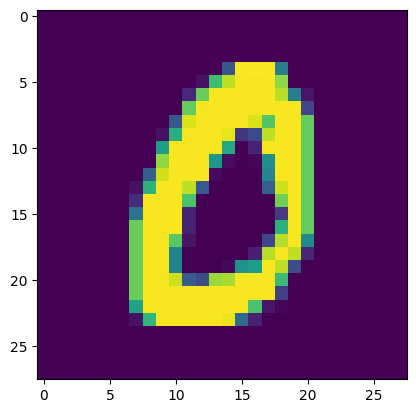

Predicted Value is: 7


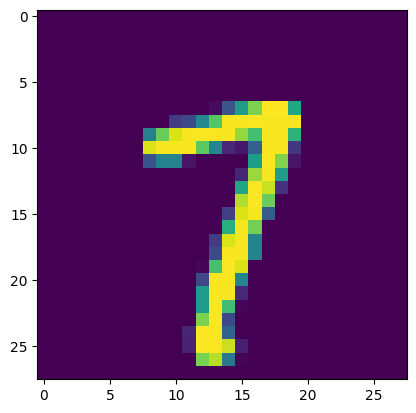

Predicted Value is: 8


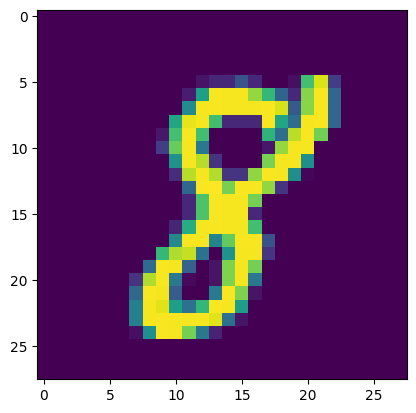

Predicted Value is: 3


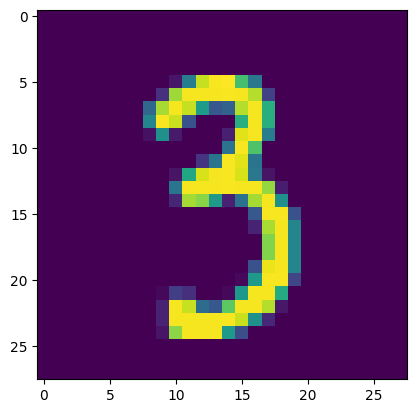

Predicted Value is: 1


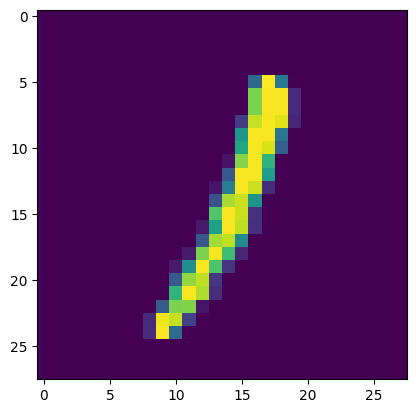

Predicted Value is: 5


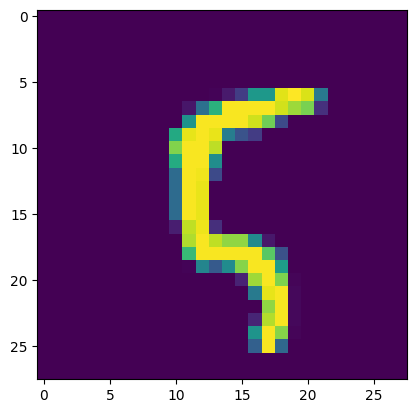

Predicted Value is: 7


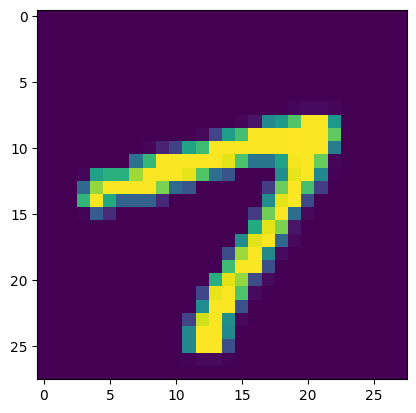

Predicted Value is: 1


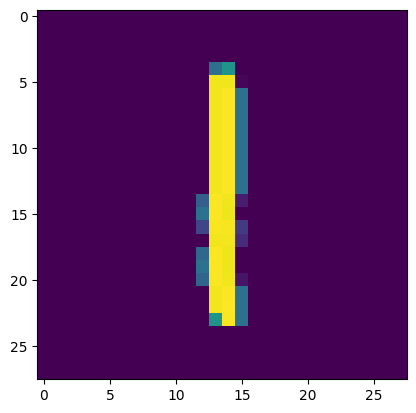

Predicted Value is: 7


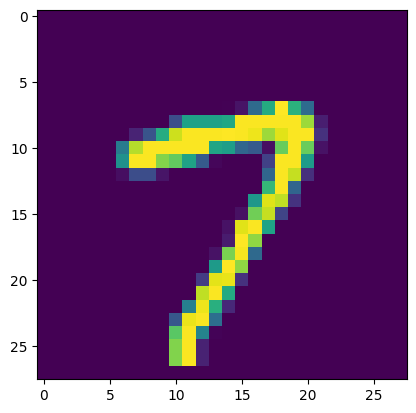

Predicted Value is: 1


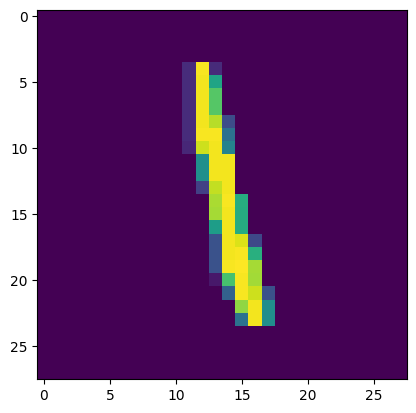

Predicted Value is: 1


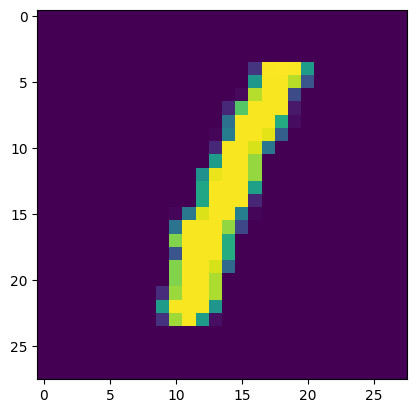

Predicted Value is: 6


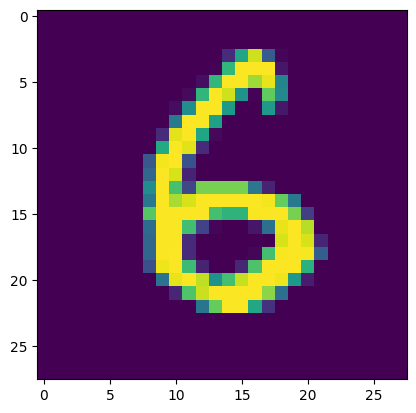

Predicted Value is: 3


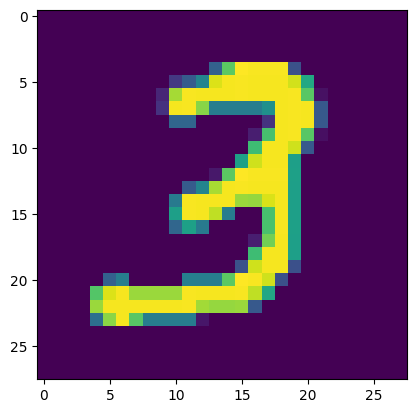

Predicted Value is: 0


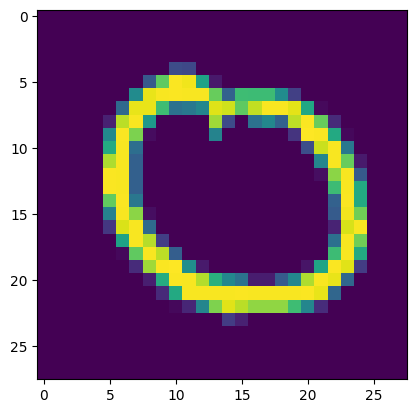

Predicted Value is: 2


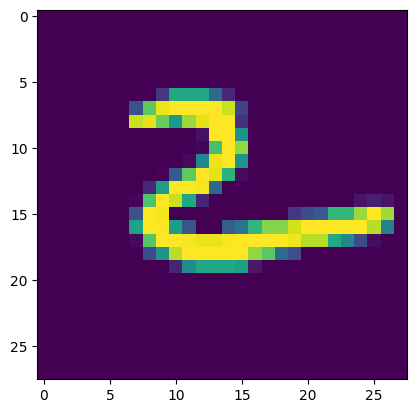

Predicted Value is: 9


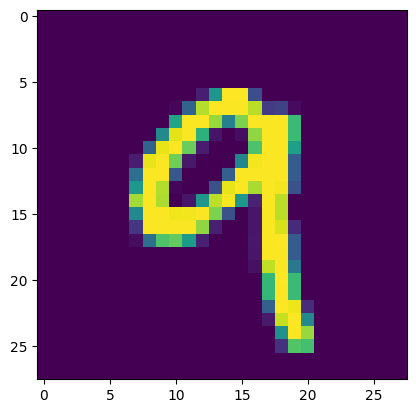

Predicted Value is: 3


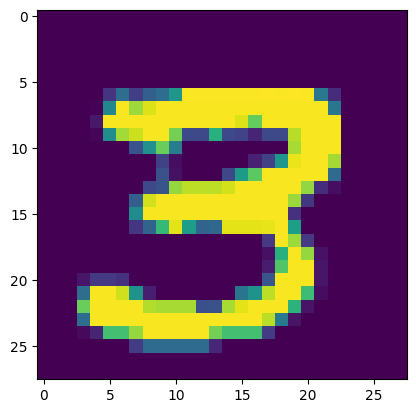

Predicted Value is: 1


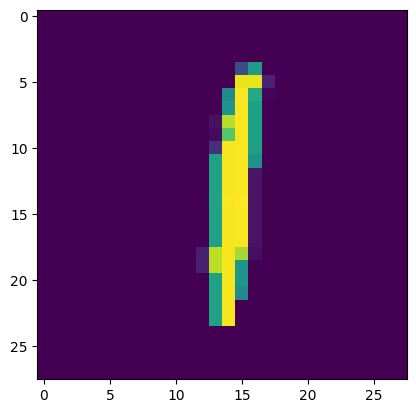

Predicted Value is: 1


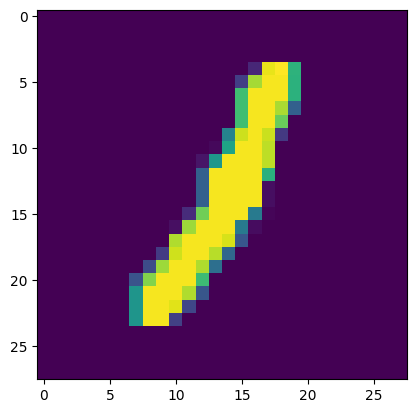

Predicted Value is: 0


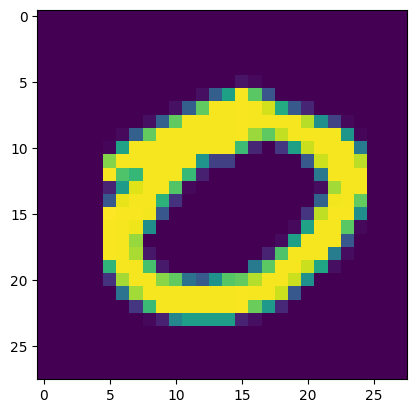

Predicted Value is: 4


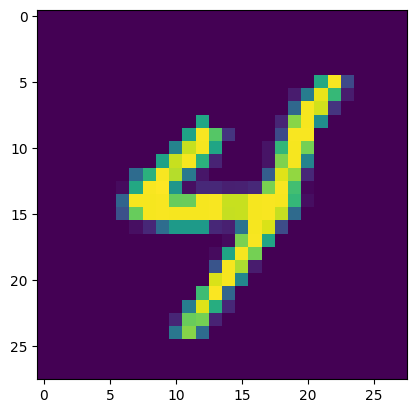

Predicted Value is: 9


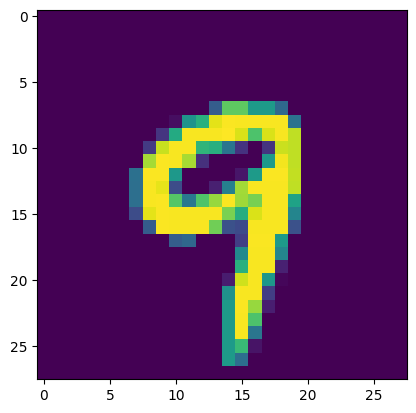

Predicted Value is: 2


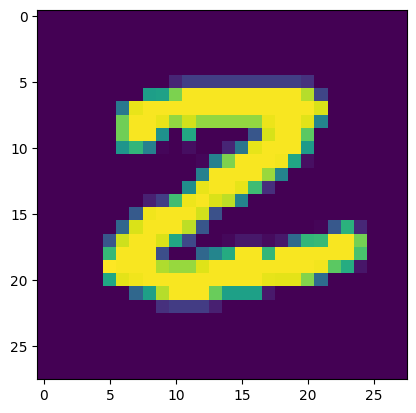

Predicted Value is: 0


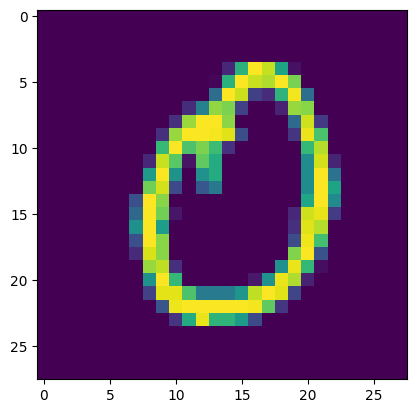

Predicted Value is: 0


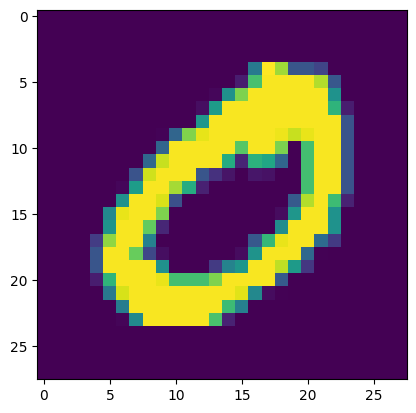

Predicted Value is: 7


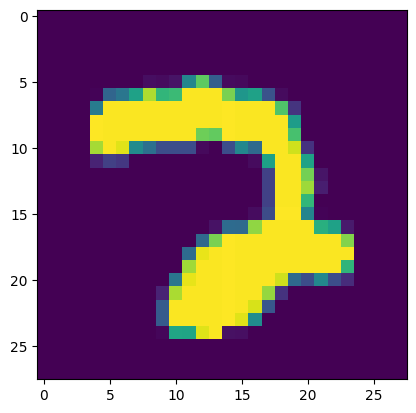

Predicted Value is: 0


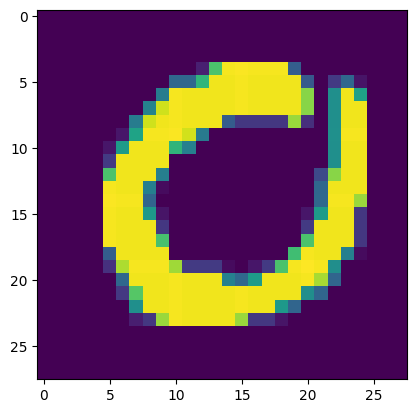

Predicted Value is: 2


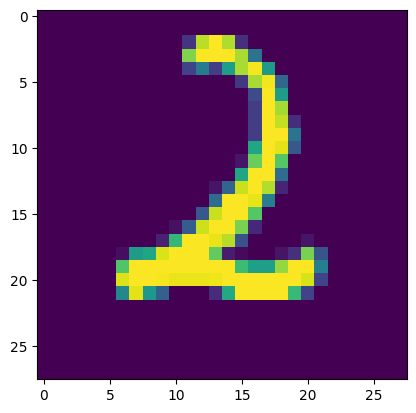

Predicted Value is: 7


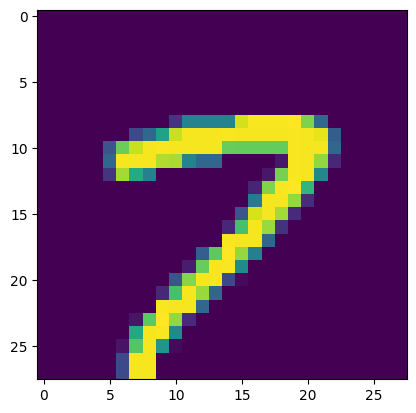

Predicted Value is: 1


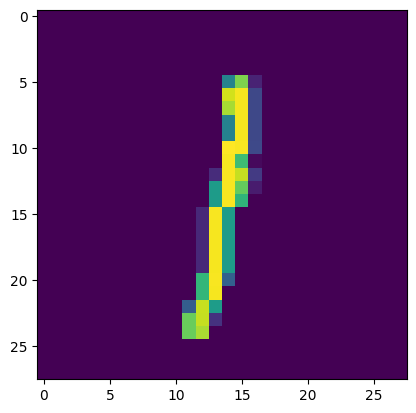

Predicted Value is: 8


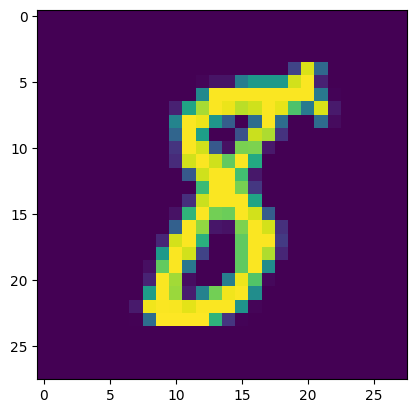

Predicted Value is: 6


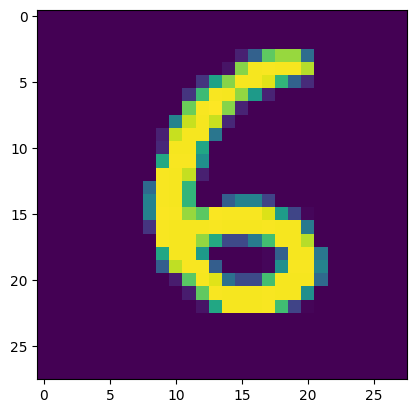

Predicted Value is: 4


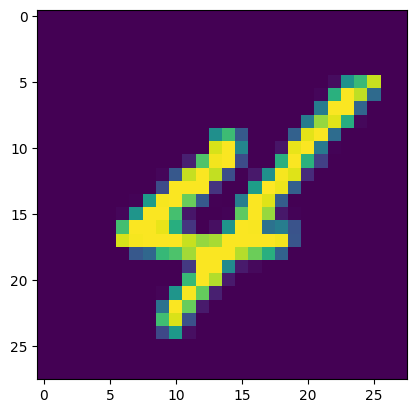

Predicted Value is: 1


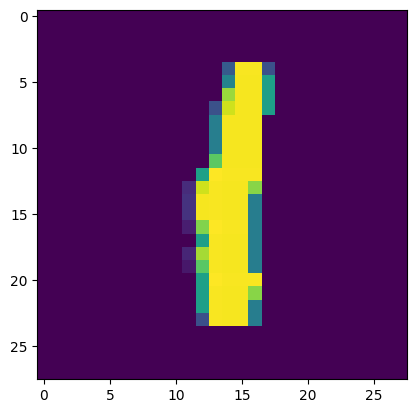

Predicted Value is: 6


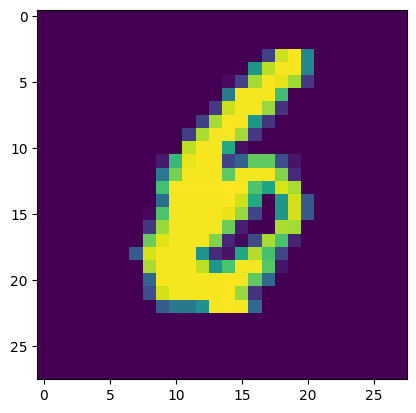

Predicted Value is: 3


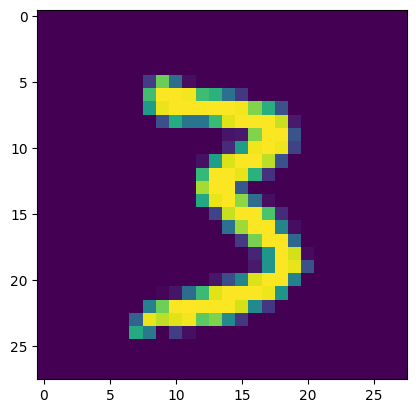

Predicted Value is: 4


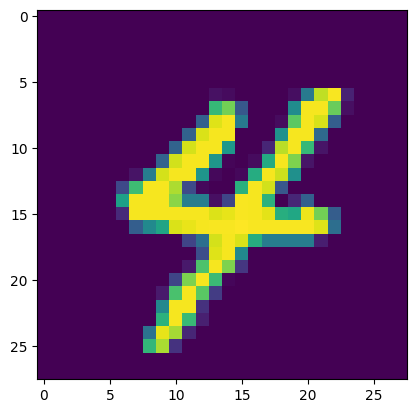

Predicted Value is: 1


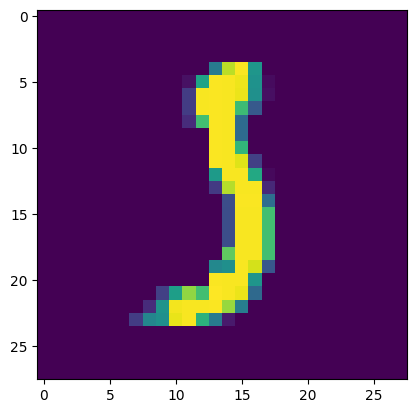

Predicted Value is: 9


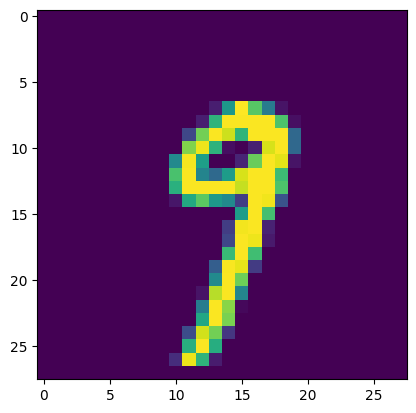

Predicted Value is: 8


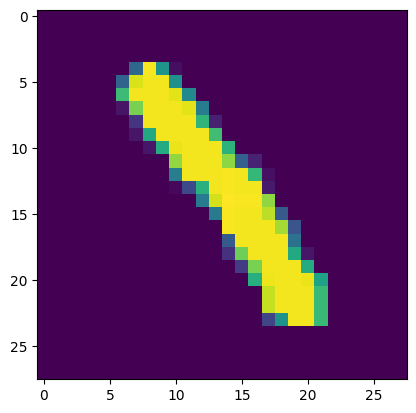

Predicted Value is: 3


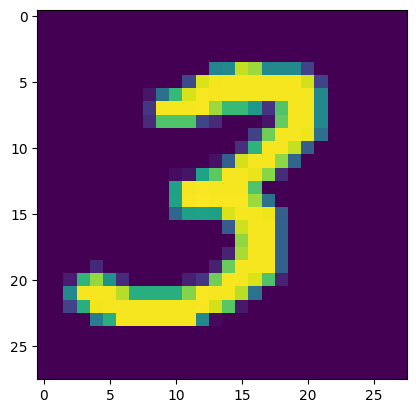

Predicted Value is: 3


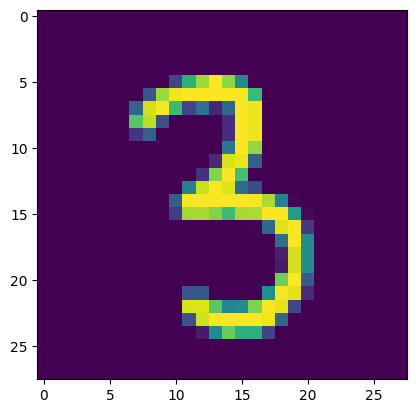

Predicted Value is: 8


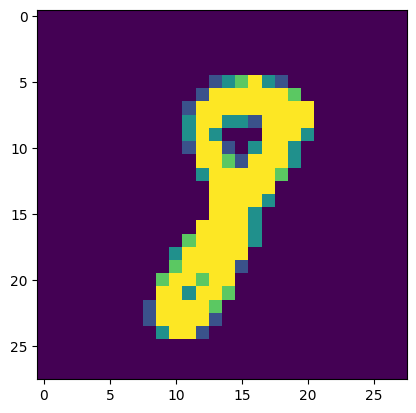

Predicted Value is: 5


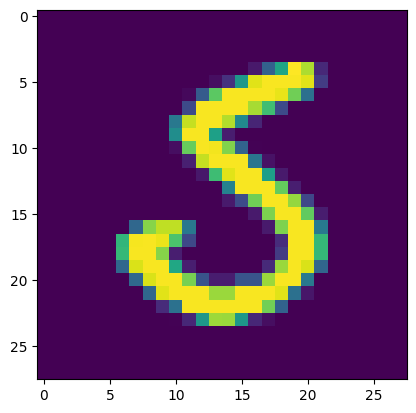

Predicted Value is: 4


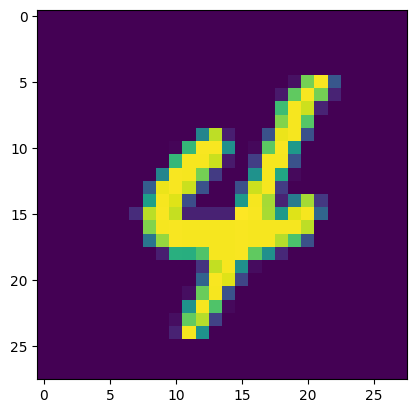

Predicted Value is: 7


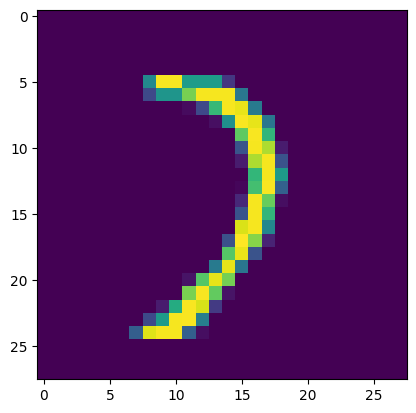

Predicted Value is: 7


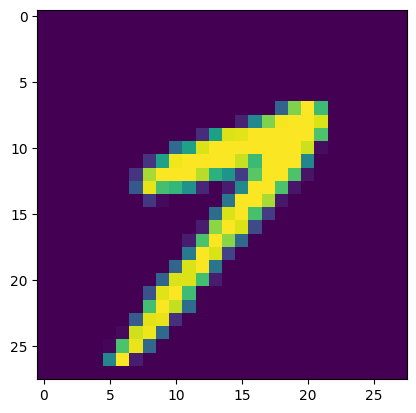

Predicted Value is: 4


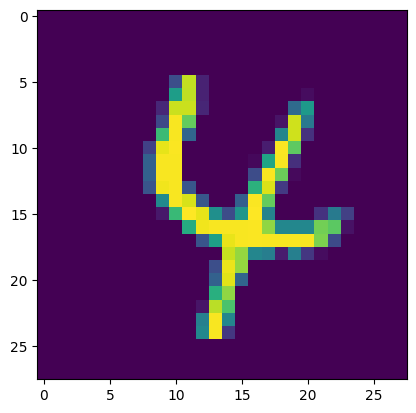

Predicted Value is: 2


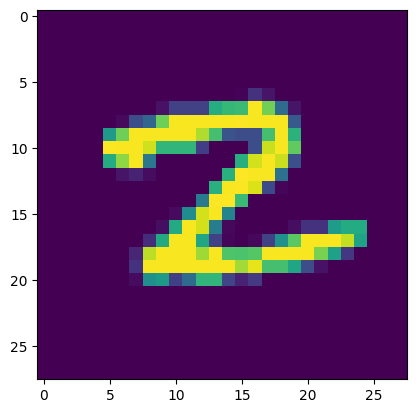

Predicted Value is: 8


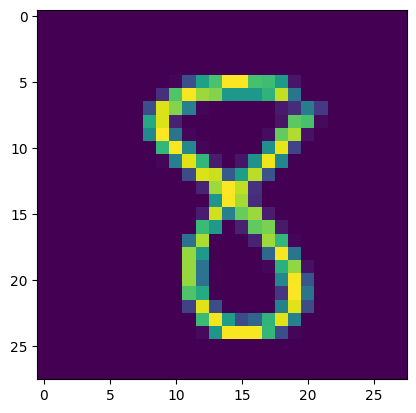

Predicted Value is: 5


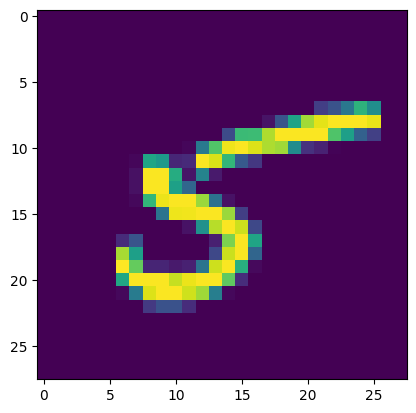

Predicted Value is: 8


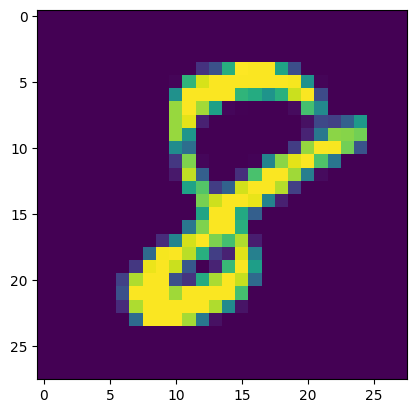

Predicted Value is: 6


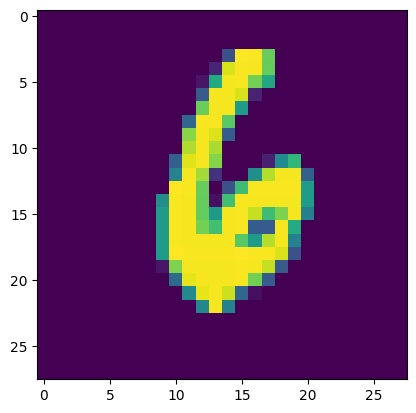

Predicted Value is: 9


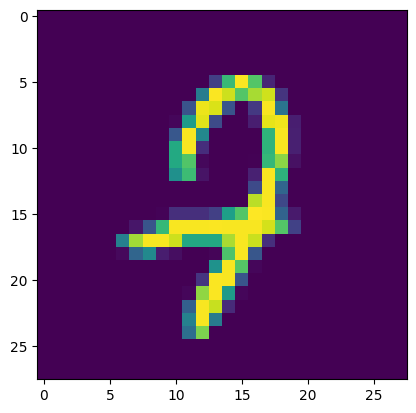

Predicted Value is: 3


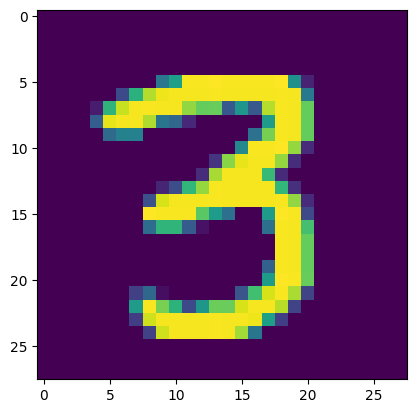

Predicted Value is: 4


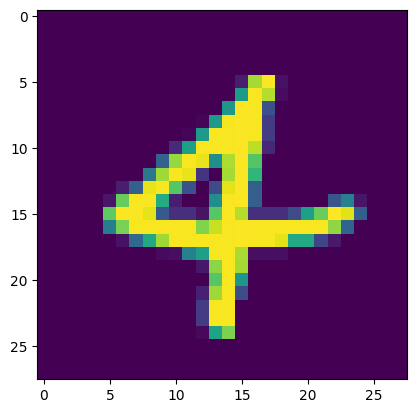

Predicted Value is: 6


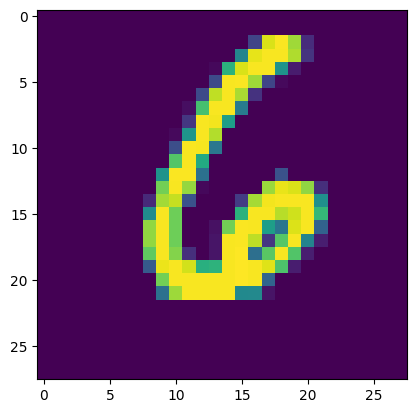

Predicted Value is: 1


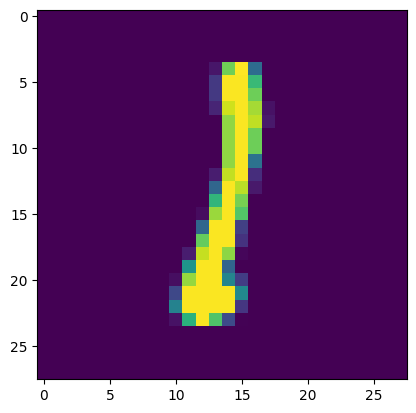

Predicted Value is: 9


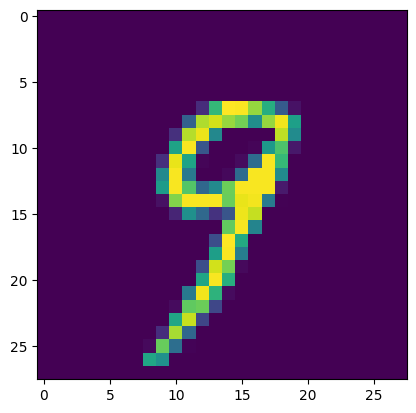

Predicted Value is: 9


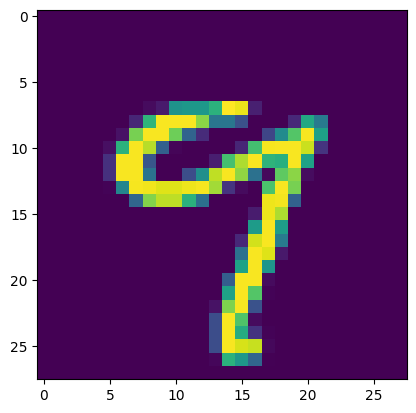

Predicted Value is: 6


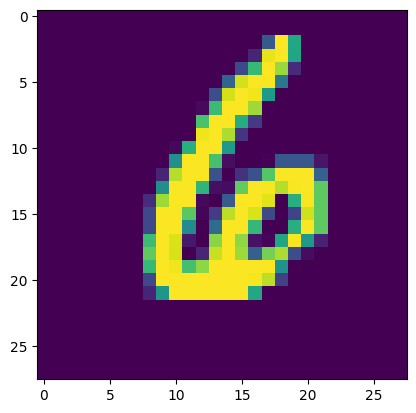

Predicted Value is: 0


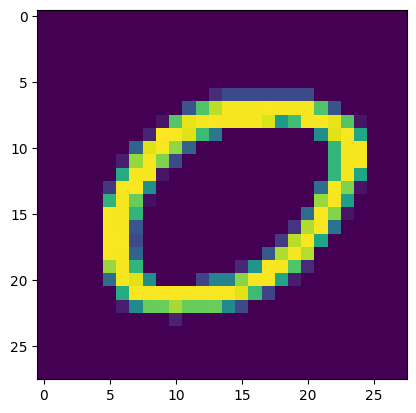

Predicted Value is: 3


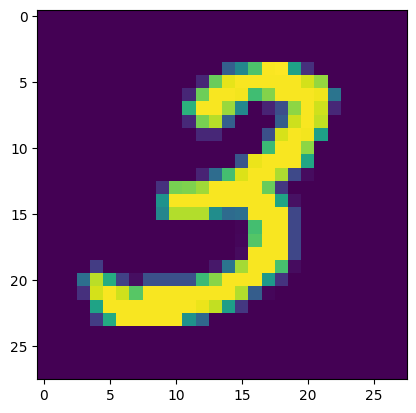

Predicted Value is: 7


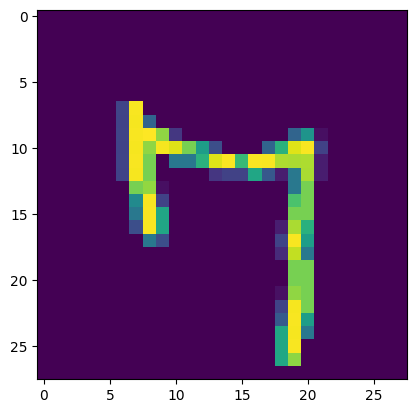

Predicted Value is: 2


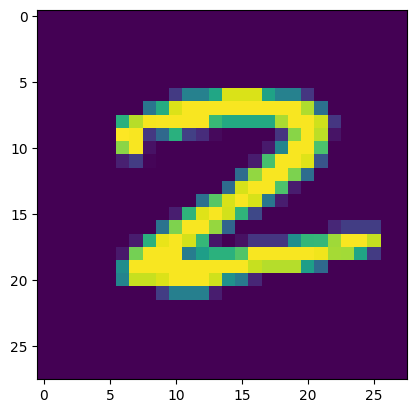

Predicted Value is: 8


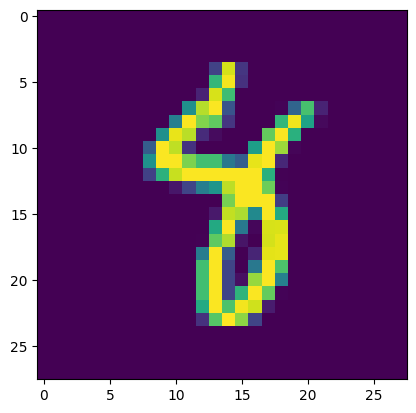

Predicted Value is: 2


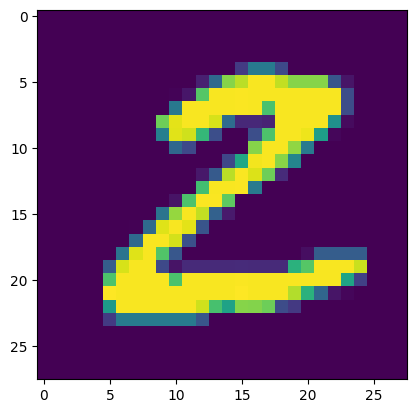

Predicted Value is: 9


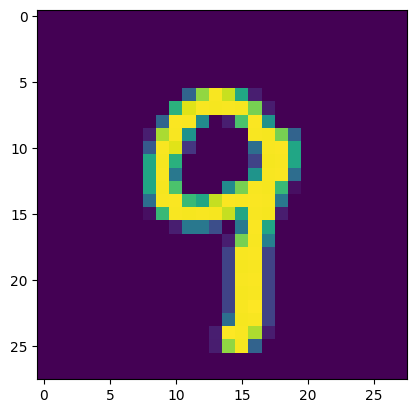

Predicted Value is: 4


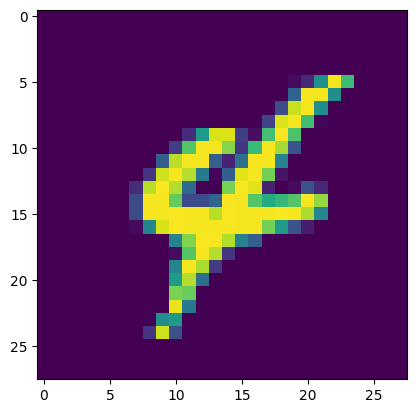

Predicted Value is: 4


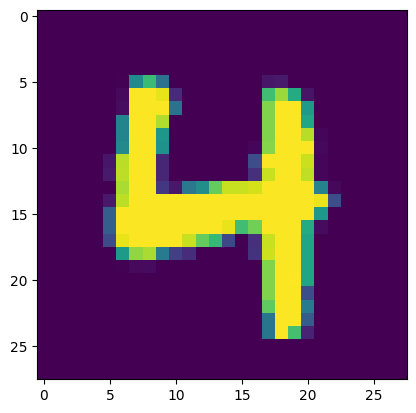

Predicted Value is: 6


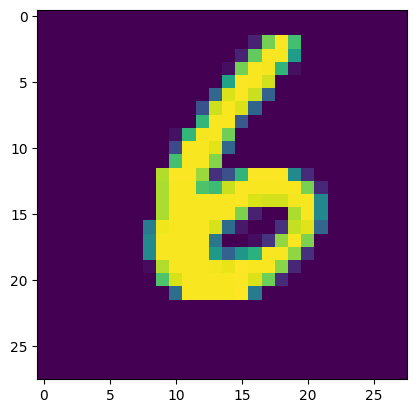

Predicted Value is: 4


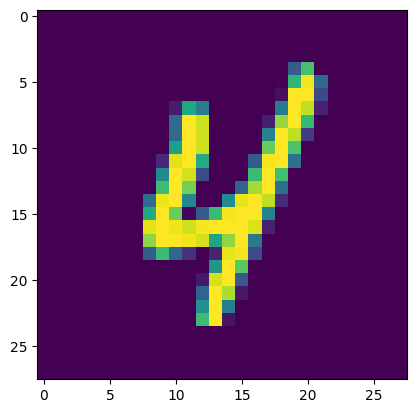

Predicted Value is: 9


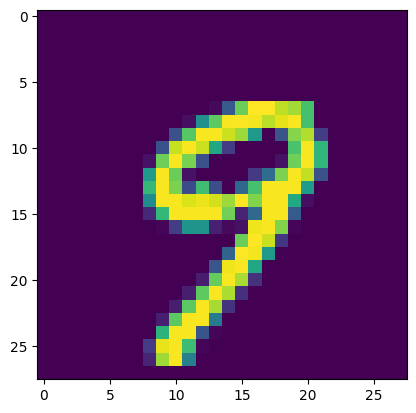

Predicted Value is: 7


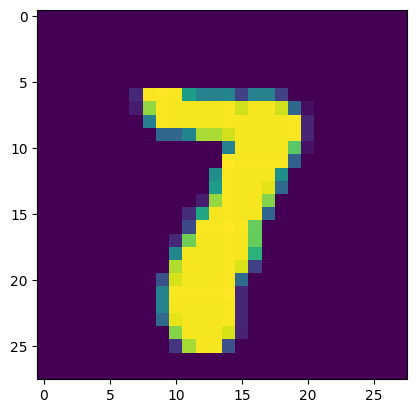

Predicted Value is: 0


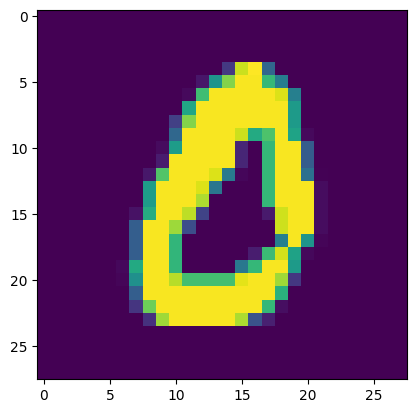

Predicted Value is: 9


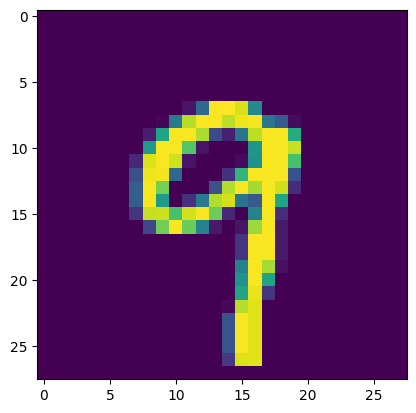

Predicted Value is: 2


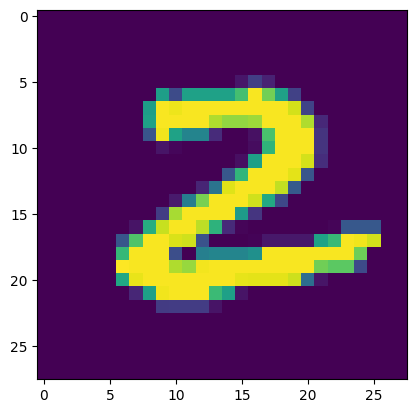

Predicted Value is: 7


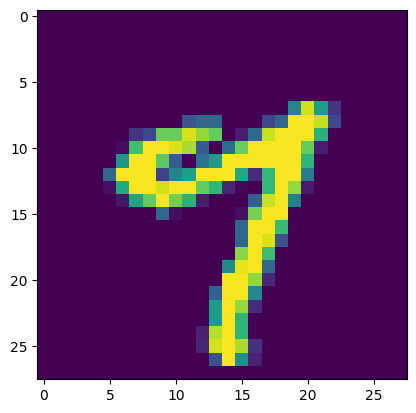

Predicted Value is: 5


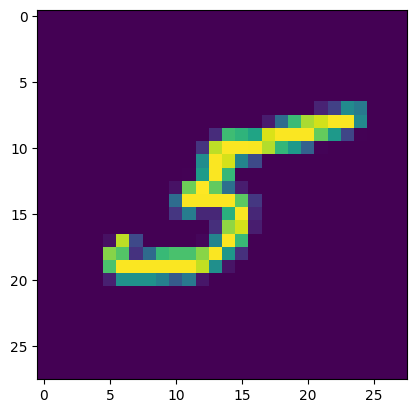

Predicted Value is: 1


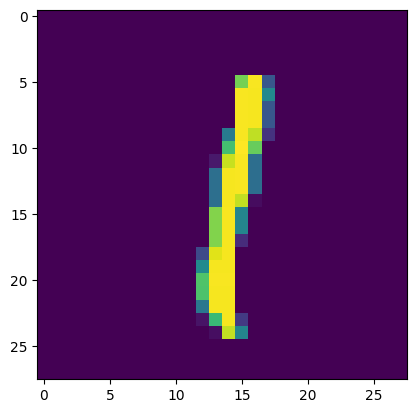

Predicted Value is: 5


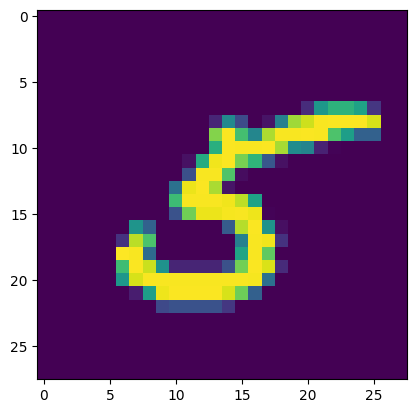

Predicted Value is: 9


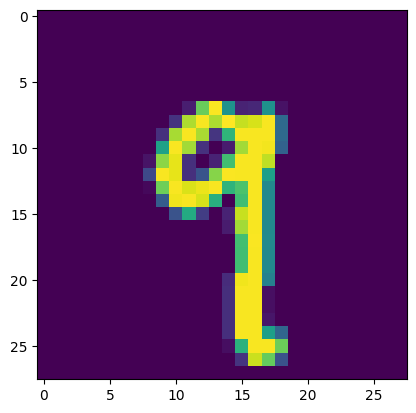

Predicted Value is: 1


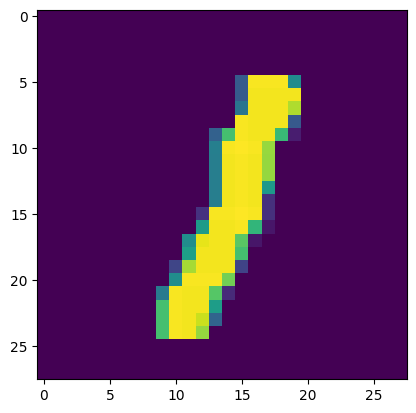

Predicted Value is: 2


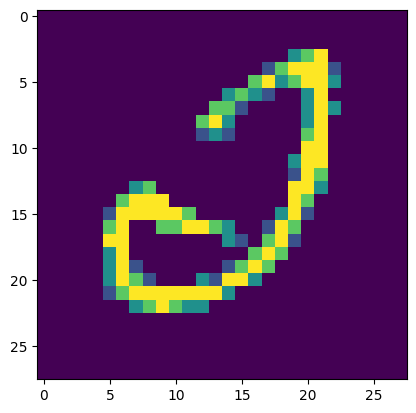

Predicted Value is: 3


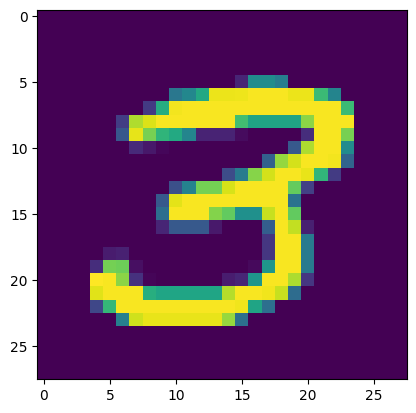

Predicted Value is: 2


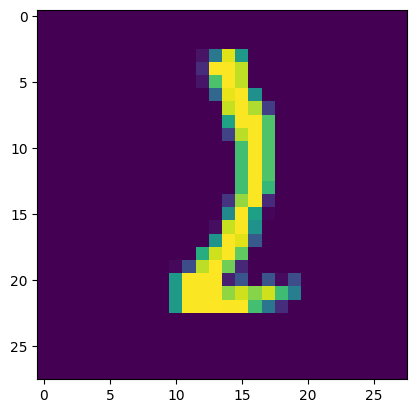

Predicted Value is: 3


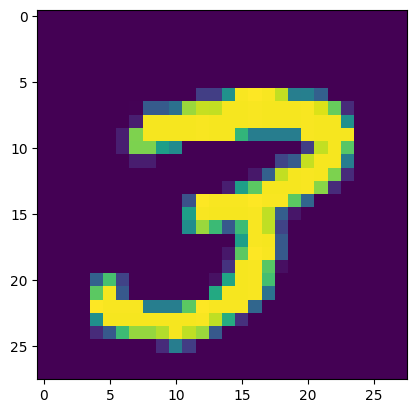

Predicted Value is: 5


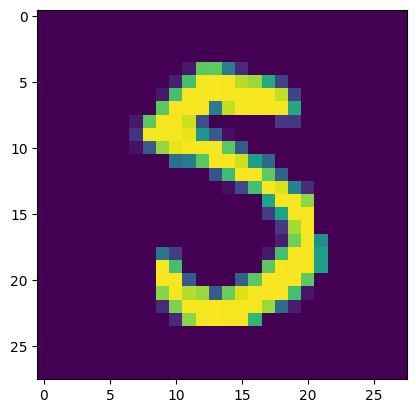

Predicted Value is: 9


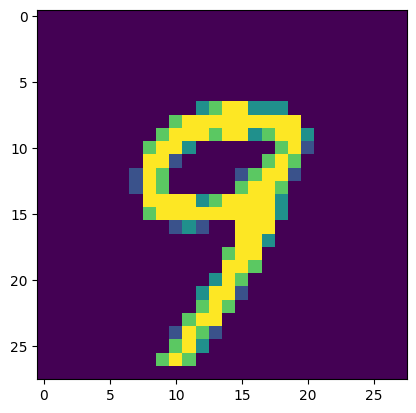

Predicted Value is: 1


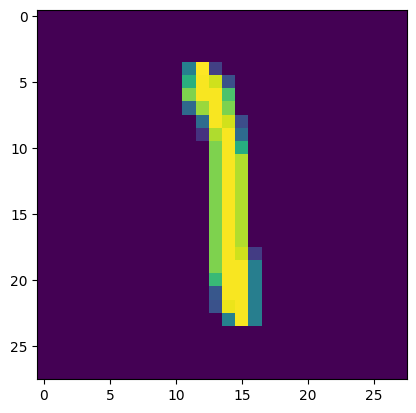

Predicted Value is: 7


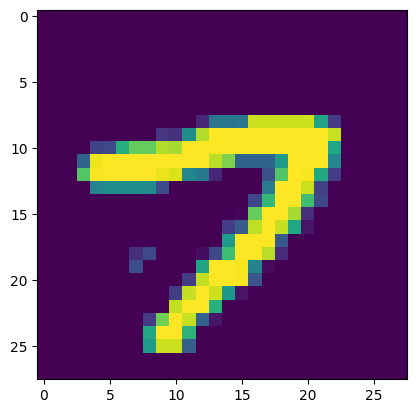

Predicted Value is: 6


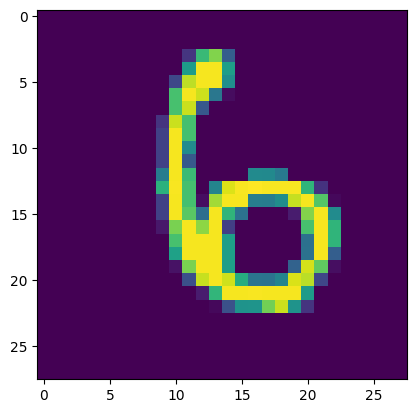

Predicted Value is: 2


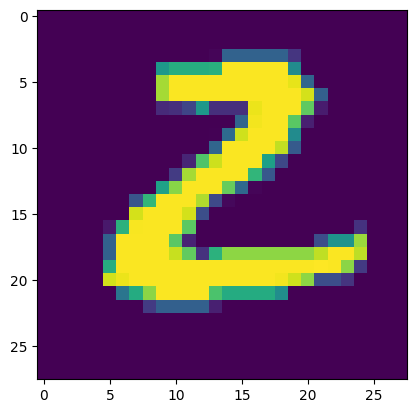

Predicted Value is: 8


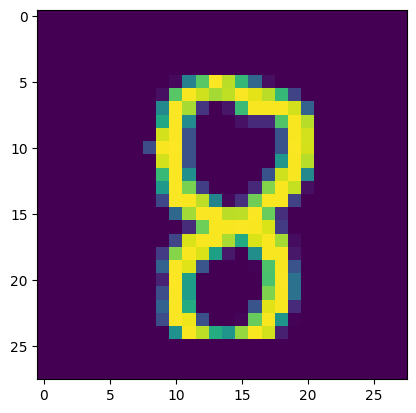

Predicted Value is: 2


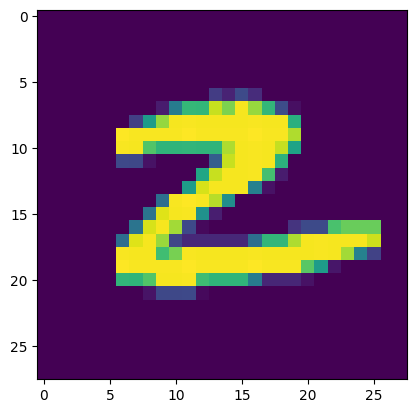

Predicted Value is: 2


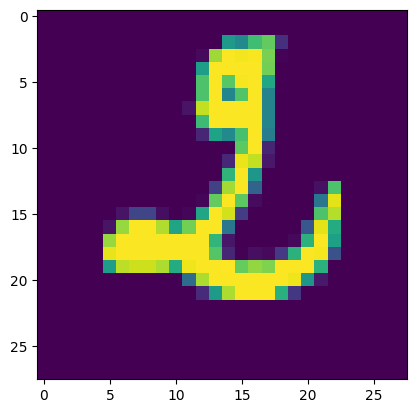

Predicted Value is: 5


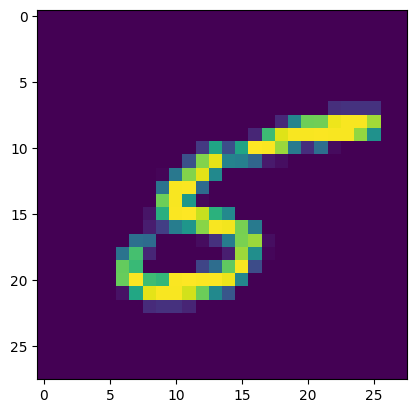

Predicted Value is: 0


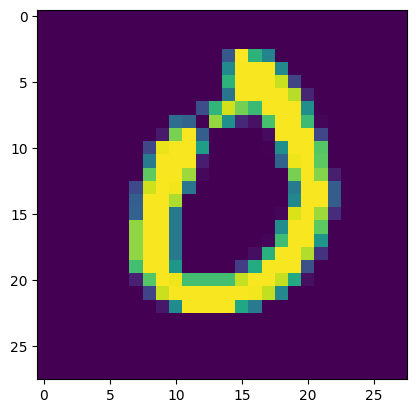

Predicted Value is: 7


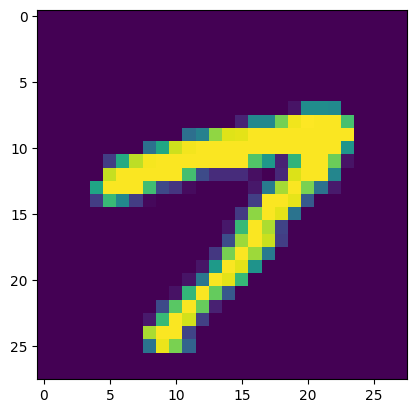

Predicted Value is: 4


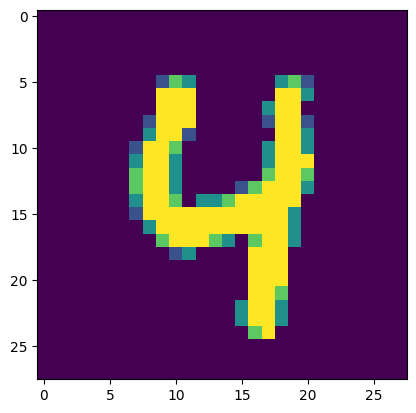

Predicted Value is: 9


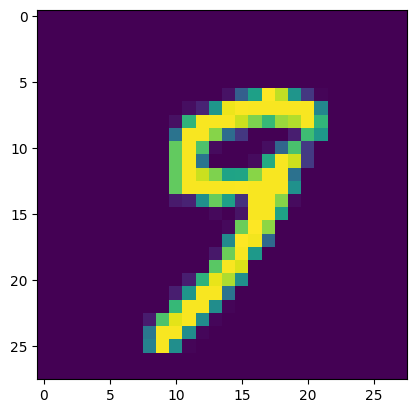

Predicted Value is: 7


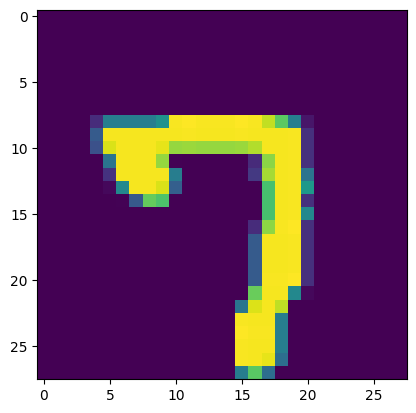

Predicted Value is: 8


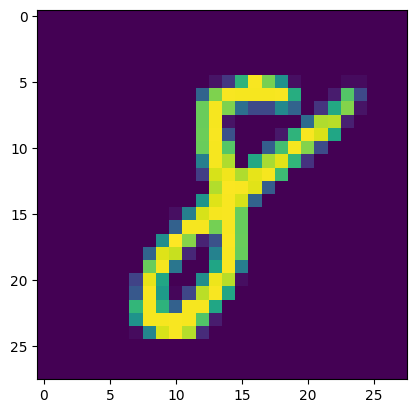

Predicted Value is: 3


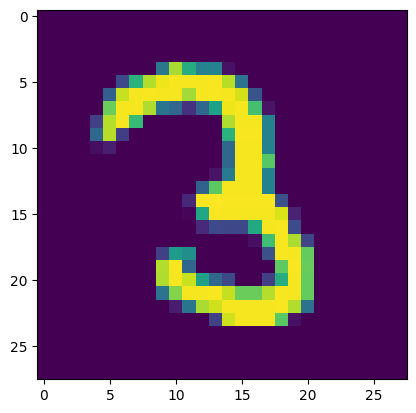

Predicted Value is: 2


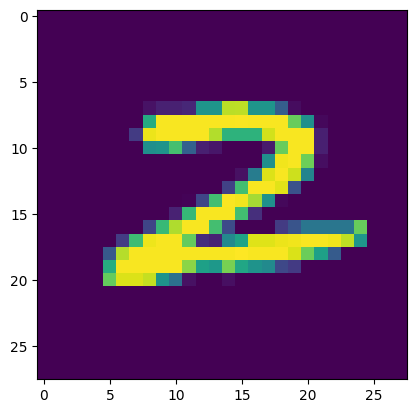

Predicted Value is: 1


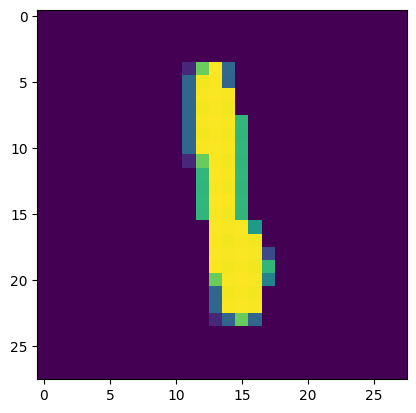

Predicted Value is: 1


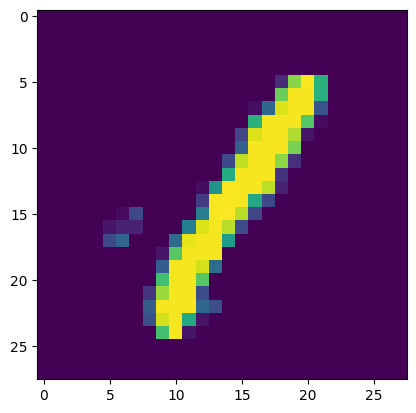

Predicted Value is: 8


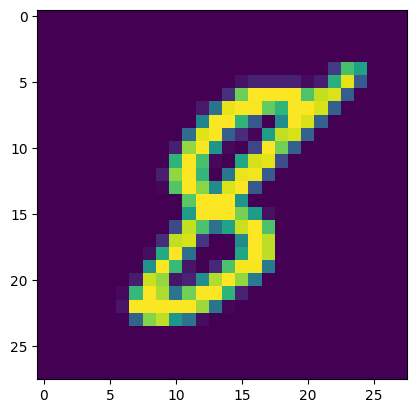

Predicted Value is: 3


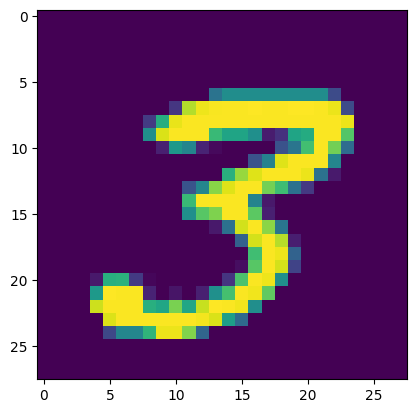

Predicted Value is: 6


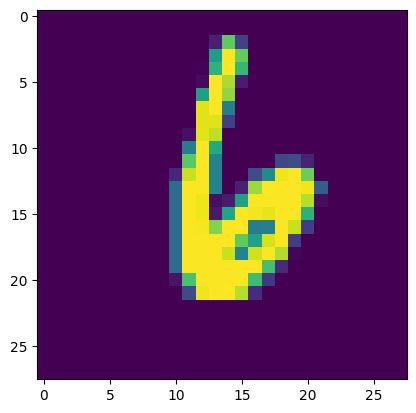

Predicted Value is: 1


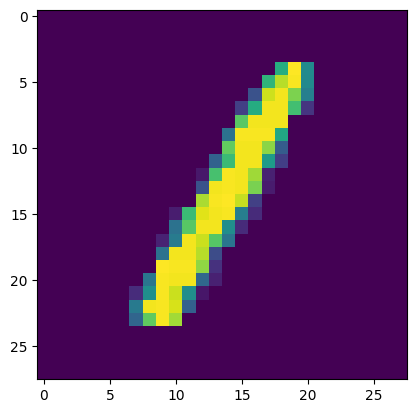

Predicted Value is: 0


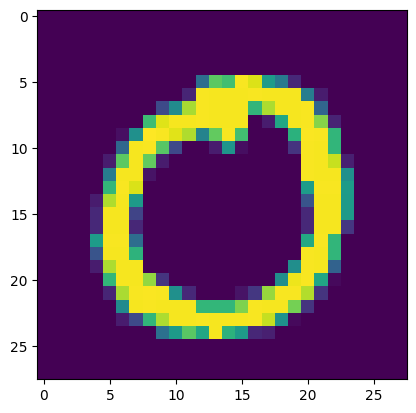

Predicted Value is: 3


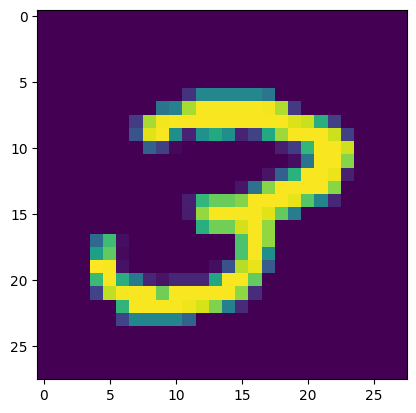

Predicted Value is: 1


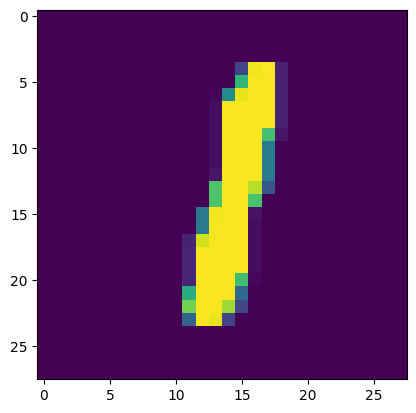

Predicted Value is: 0


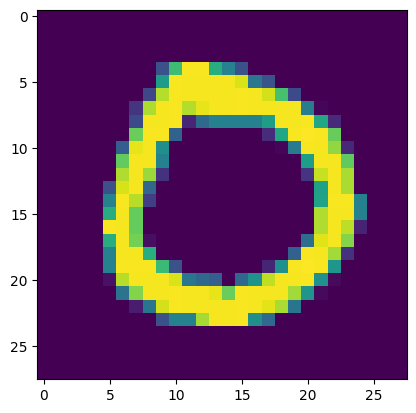

Predicted Value is: 0


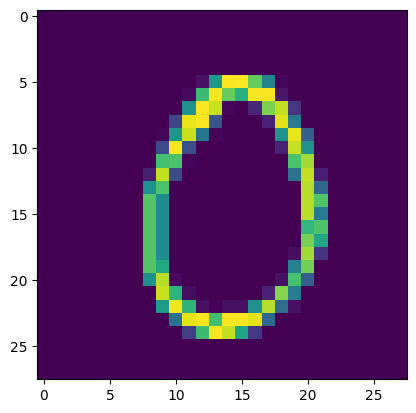

Predicted Value is: 1


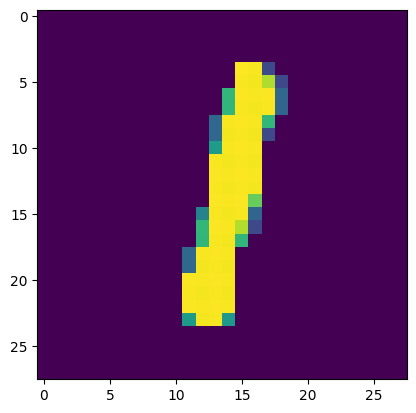

Predicted Value is: 7


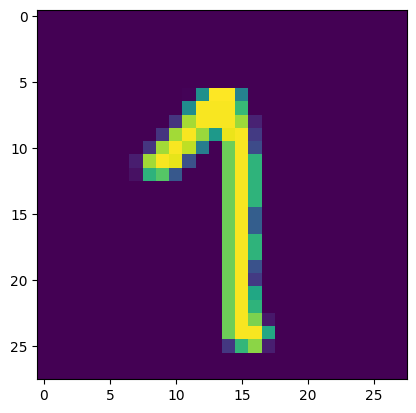

Predicted Value is: 2


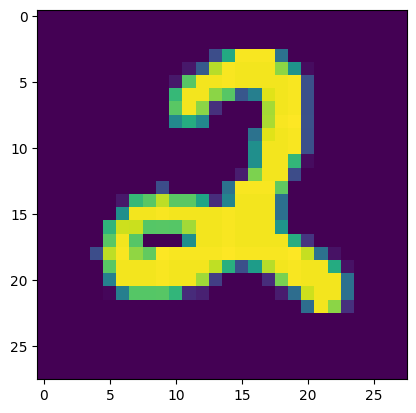

Predicted Value is: 7


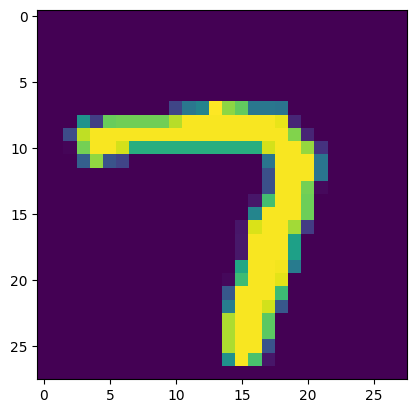

Predicted Value is: 3


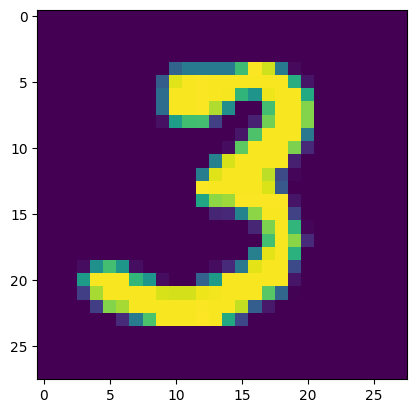

Predicted Value is: 0


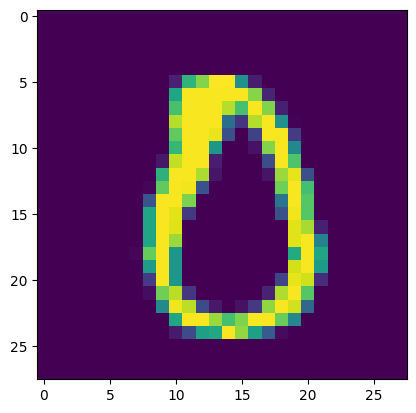

Predicted Value is: 4


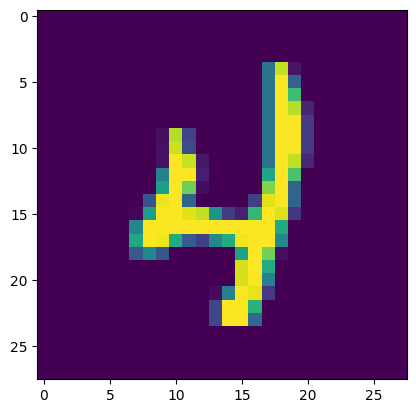

Predicted Value is: 6


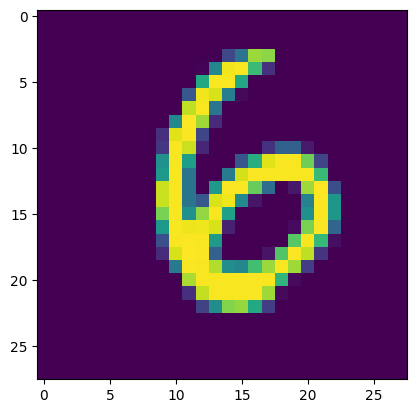

Predicted Value is: 5


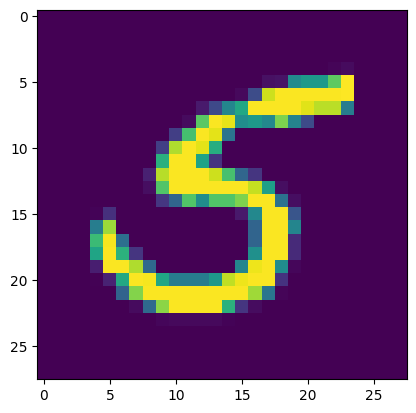

Predicted Value is: 2


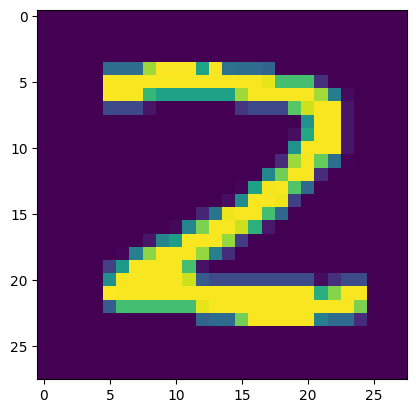

Predicted Value is: 6


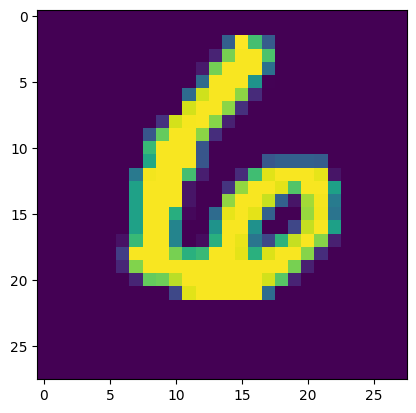

Predicted Value is: 4


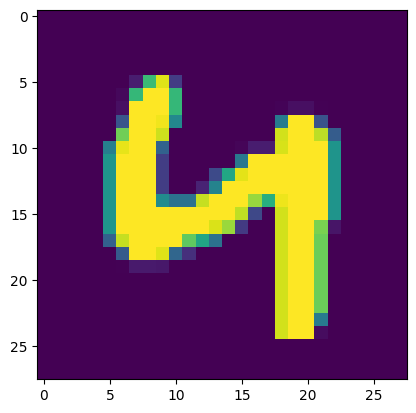

Predicted Value is: 7


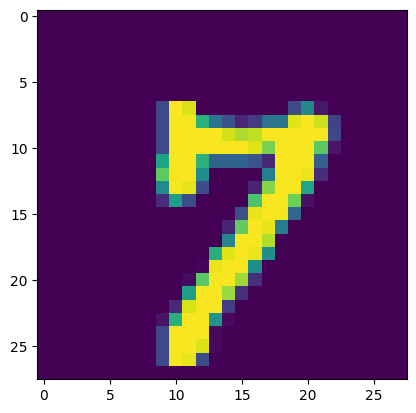

Predicted Value is: 3


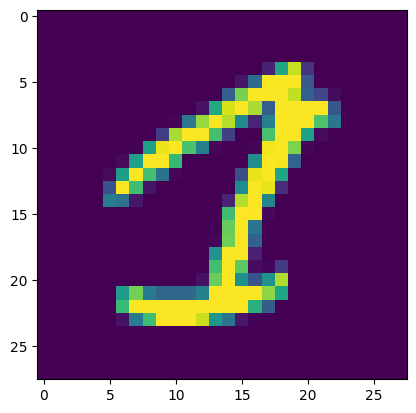

Predicted Value is: 8


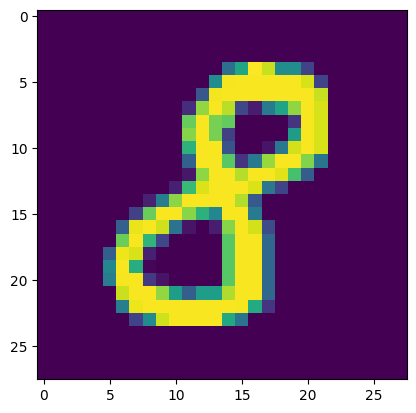

Predicted Value is: 9


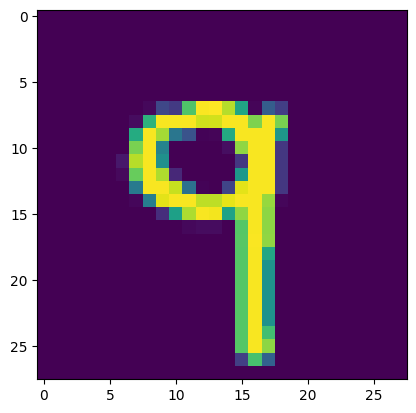

Predicted Value is: 9


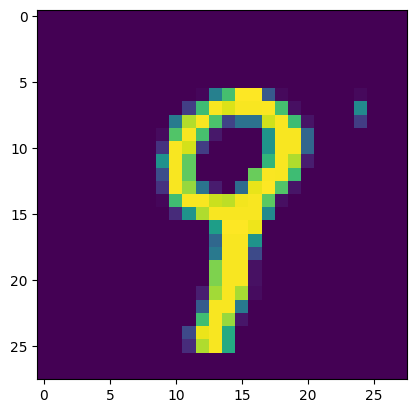

Predicted Value is: 3


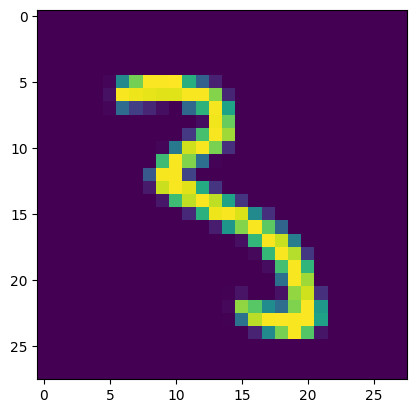

Predicted Value is: 0


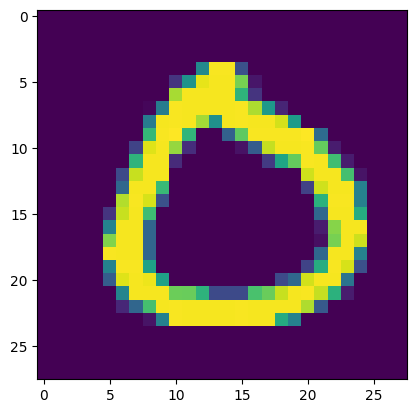

Predicted Value is: 7


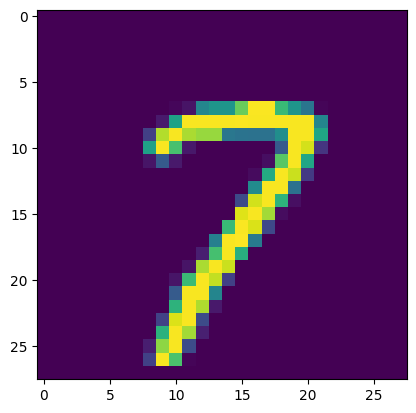

Predicted Value is: 1


KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt

model.eval()
for i in range(len(testing_data)):
    data, target = testing_data[i]
    data = data.unsqueeze(0).to(device)
    output = model(data)
    predicted = prediction = output.argmax(dim = 1, keepdim= True).item()
    print(f"Predicted Value is: {predicted}")
    image = data.squeeze(0).squeeze(0).cpu().numpy()
    
    plt.imshow(image, cmap = 'viridis')
    plt.show()

    